In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

### Read cleaned datasets for topic modeling

In [2]:
directory = os.getcwd()

In [7]:
# read cleaned df for topics

df_eu = pd.read_csv('EU/completely_cleaned_EU.csv')
df_sa = pd.read_csv('SA/completely_cleaned_SA.csv')
df_us = pd.read_csv('US/completely_cleaned_no_extra_state_US.csv')

In [8]:
# group by country/state and count occurrences

grouped_eu = df_eu.groupby(by='place_country').agg(place_country=pd.NamedAgg(column='place_country', aggfunc='first'), count_country=pd.NamedAgg(column='place_country', aggfunc='count')).reset_index(drop=True)
grouped_sa = df_sa.groupby(by='place_country').agg(place_country=pd.NamedAgg(column='place_country', aggfunc='first'), count_country=pd.NamedAgg(column='place_country', aggfunc='count')).reset_index(drop=True)
grouped_us = df_us.groupby(by='state_y').agg(place_country=pd.NamedAgg(column='state_y', aggfunc='first'), count_country=pd.NamedAgg(column='state_y', aggfunc='count')).reset_index(drop=True)

# sort by count
grouped_eu = grouped_eu.sort_values(by='count_country', ascending=False)
grouped_sa = grouped_sa.sort_values(by='count_country', ascending=False)
grouped_us = grouped_us.sort_values(by='count_country', ascending=False)

#### Count number of tweets per country

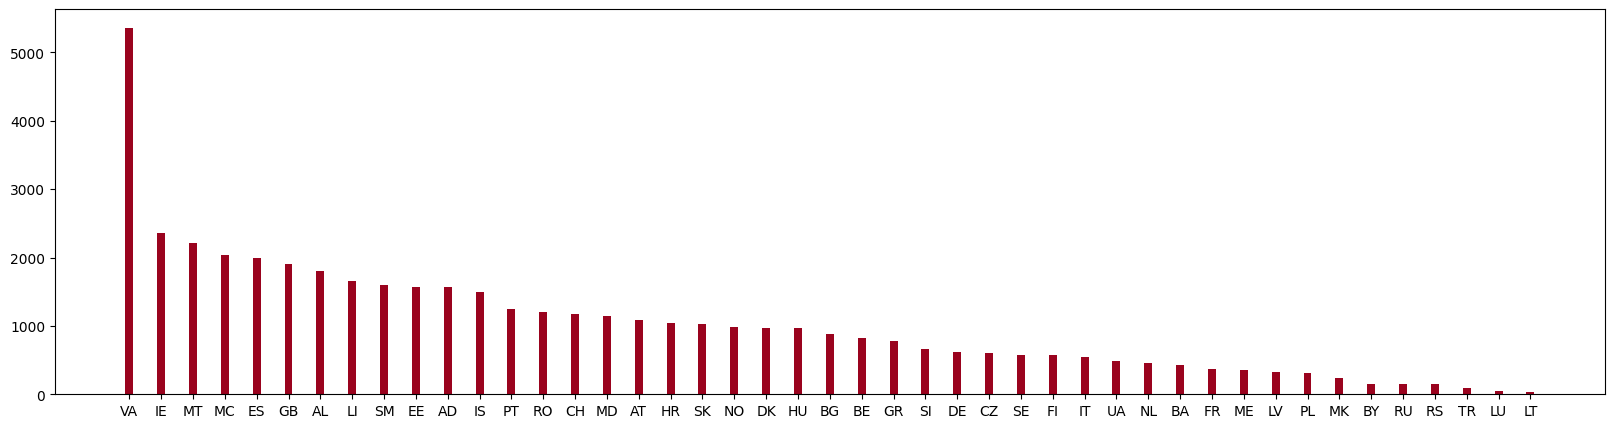

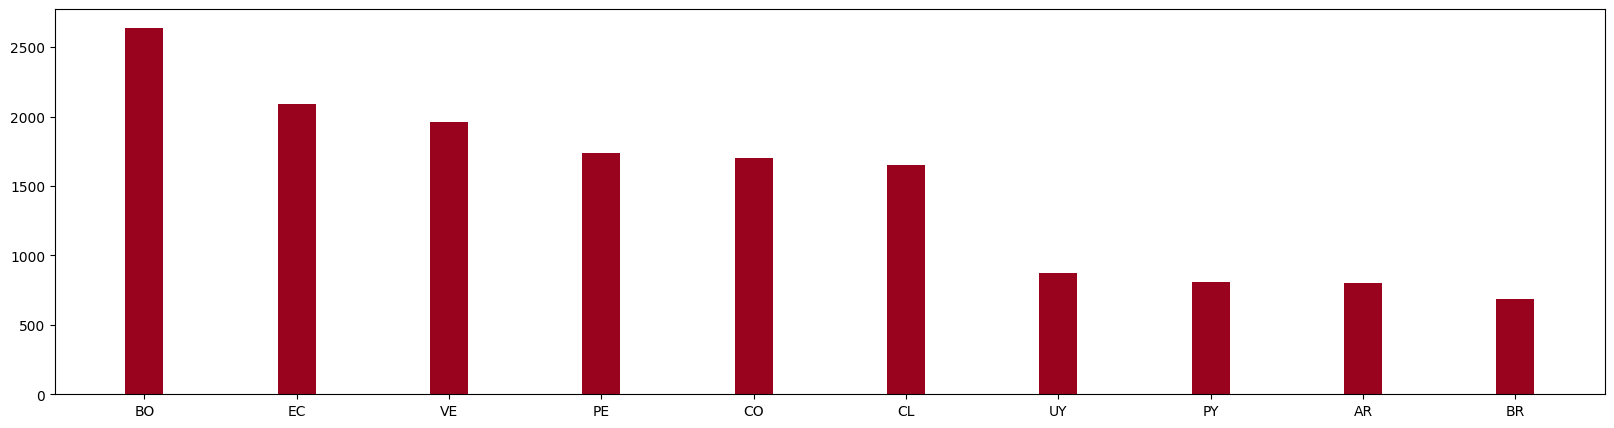

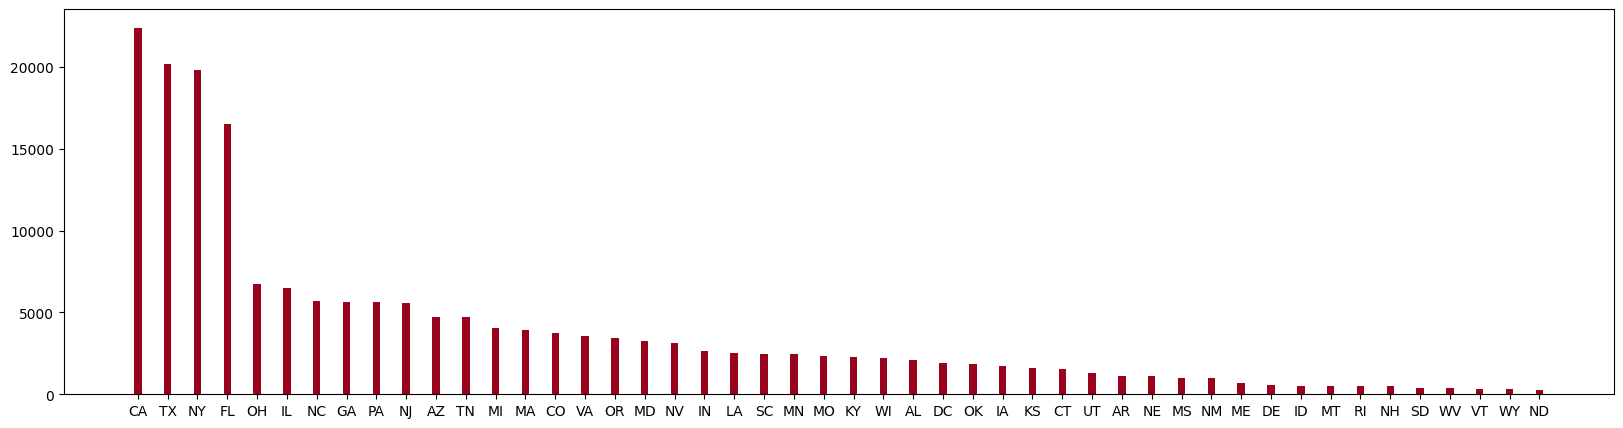

In [9]:
# histogram of counts

list_df = [grouped_eu, grouped_sa, grouped_us]
list_path = ['EU/number_of_tweets.png', 'SA/number_of_tweets.png', 'US/number_of_tweets.png']

for i in range(len(list_df)):

    df = list_df[i]

    fig = plt.figure(figsize = (20, 5))

    # bar width
    bar_width = 0.25

    x1 = list(df['place_country'])
    #np.arange(len(df))
    '''x2 = [x + bar_width for x in x1]
    x3 = [x + 2*bar_width for x in x1]
    '''
    '''y1 = np.array(df_tot['count_tot_eu'])
    y2 = np.array(df_tot['count_tot_sa'])
    y3 = np.array(df_tot['count_tot_us'])'''
    y1 = np.array(df['count_country'])

    # creating the bar plot
    plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')
    '''plt.bar(x2, y2, color ='#ffba08', width = bar_width, label='South America')
    plt.bar(x3, y3, color ='#006d77', width = bar_width, label='US')'''


    '''plt.xlabel("Language", fontsize=16)
    plt.ylabel("Tweets percentage", fontsize=16)
    plt.xticks([x + bar_width/2 for x in x1], df['lang'], size=12)
    plt.yticks(size=12)
    plt.legend(fontsize=12)'''

    fig.savefig(list_path[i])

### Topics distribution

#### Read topics df

In [10]:
topics_eu = pd.read_csv('EU/topic_EU_70.csv')
topics_sa = pd.read_csv('SA/topic_SA_30.csv')
topics_us = pd.read_csv('US/topic_no_extra_state_US_150.csv')

In [11]:
topics_eu

,tweet id,cleaned_text,topic_num,topic_num_forced,topic_num_prob,topic_num_distr,topic_num_c_tf_idf,topic_num_embeddings
0,1.181824e+18,early morning walk be breakfast around the stu...,58,58,58,58,58,58
1,1.564693e+18,"i am. it's the end of it, so i'm enjoying the ...",-1,46,10,46,46,10
2,1.118089e+18,drop dead gorgeous .,52,52,52,52,52,52
3,1.399343e+18,"summer stories await ljetoincroatia ,",33,33,33,33,33,33
4,1.126602e+18,"day - ""if it ain't raining, it ain't training""...",17,17,17,17,17,17
...,...,...,...,...,...,...,...,...
46060,1.506981e+18,"im at the border in , . this is looking into ....",-1,35,64,35,35,3
46061,1.506903e+18,"thanks to unicef goodwill ambassador, orlando ...",35,35,35,35,35,35
46062,1.506876e+18,"two wrongs don't make it right, for sure. but ...",-1,5,5,5,3,5
46063,1.506768e+18,very good meeting with the minister of culture...,35,35,35,35,35,35


#### Merge topics and tweets

In [12]:
# rename columns to match
df_eu.rename(columns={'id': 'tweet id'}, inplace=True)
df_sa.rename(columns={'id': 'tweet id'}, inplace=True)
df_us.rename(columns={'id': 'tweet id'}, inplace=True)

merged_eu = pd.merge(df_eu, topics_eu, how='left', on='tweet id')
merged_sa = pd.merge(df_sa, topics_sa, how='left', on='tweet id')
merged_us = pd.merge(df_us, topics_us, how='left', on='tweet id')

In [13]:
merged_eu.to_csv('EU/merged_EU.csv', index=False)
merged_sa.to_csv('SA/merged_SA.csv', index=False)
merged_us.to_csv('US/merged_US.csv', index=False)

### Check which countries are mentioned in different topics

#### Group by destination country

In [14]:
# remove extra states US

merged_us = merged_us[~merged_us['state_x'].isin(['United States Virgin Islands', 'American Samoa'])]

In [15]:
# destinatio country = country_code column
grouped_eu = merged_eu.groupby(by=['country_code', 'topic_num']).agg(topic_num=pd.NamedAgg(column='topic_num', aggfunc='first'), destination_country=pd.NamedAgg(column='country_code', aggfunc='first'), count_destination_country=pd.NamedAgg(column='country_code', aggfunc='count')).reset_index(drop=True)
grouped_sa = merged_sa.groupby(by=['country_code', 'topic_num']).agg(topic_num=pd.NamedAgg(column='topic_num', aggfunc='first'), destination_country=pd.NamedAgg(column='country_code', aggfunc='first'), count_destination_country=pd.NamedAgg(column='country_code', aggfunc='count')).reset_index(drop=True)
grouped_us = merged_us.groupby(by=['state_x', 'topic_num']).agg(topic_num=pd.NamedAgg(column='topic_num', aggfunc='first'), destination_state=pd.NamedAgg(column='state_x', aggfunc='first'), count_destination_state=pd.NamedAgg(column='state_x', aggfunc='count')).reset_index(drop=True)

In [16]:
grouped_eu

,topic_num,destination_country,count_destination_country
0,-1,ad,539
1,0,ad,12
2,1,ad,21
3,2,ad,9
4,4,ad,11
...,...,...,...
2398,58,va,1
2399,60,va,20
2400,62,va,1
2401,66,va,2


#### Plot macro-topics we are interested in

In [68]:
# travel/transportation topics EU
travel_eu = [12, 18, 25, 32, 36, 41, 46, 53] # from 12 to 46 -> travel | from 3 to 64 -> politics , 3, 5, 35, 48, 54, 55, 56, 61, 64
# travel/transportation topics EU
travel_sa = [25, 29, 45] # from 25 to 45 -> travel | from 0 to 52 -> politics , 0, 13, 18, 31, 36, 48, 50, 52
# travel/transportation topics EU
travel_us = [9, 11, 12, 41, 44, 69, 112, 127, 17, 19, 22, 34, 61, 85, 121] # from 9 to 127 -> travel | from 17 to 121 -> accidents | from 0 to 110 -> politics , 0, 1, 27, 60, 66, 70, 72, 73, 81, 87, 90, 91, 95, 101, 104, 107, 110

# politics EU
politics_eu = [3, 5, 35, 48, 54, 55, 56, 61, 64] # from 3 to 64 -> politics | from 12 to 46 -> travel
# politics SA
politics_sa = [0, 13, 18, 31, 36, 48, 50, 52] # from 0 to 52 -> politics | from 25 to 45 -> travel
# politics US
politics_us = [0, 1, 27, 60, 66, 70, 72, 73, 81, 87, 90, 91, 95, 101, 104, 107, 110] # from 0 to 110 -> politics | from 9 to 127 -> travel | from 17 to 121 -> accidents

# extract topics
# travel
df_travel_eu = grouped_eu[grouped_eu['topic_num'].isin(travel_eu)]
# group by country
df_travel_eu_grouped = df_travel_eu.groupby(by=['destination_country']).agg(destination_country=pd.NamedAgg(column='destination_country', aggfunc='first'), count_destination_country=pd.NamedAgg(column='count_destination_country', aggfunc='sum')).reset_index(drop=True)
df_travel_eu_grouped = df_travel_eu_grouped.sort_values(by='count_destination_country', ascending=False)
# politics
df_politics_eu = grouped_eu[grouped_eu['topic_num'].isin(politics_eu)]
# group by country
df_politics_eu_grouped = df_politics_eu.groupby(by=['destination_country']).agg(destination_country=pd.NamedAgg(column='destination_country', aggfunc='first'), count_destination_country=pd.NamedAgg(column='count_destination_country', aggfunc='sum')).reset_index(drop=True)
df_politics_eu_grouped = df_politics_eu_grouped.sort_values(by='count_destination_country', ascending=False)


# extract topics
# travel
df_travel_sa = grouped_sa[grouped_sa['topic_num'].isin(travel_sa)]
# group by country
df_travel_sa_grouped = df_travel_sa.groupby(by=['destination_country']).agg(destination_country=pd.NamedAgg(column='destination_country', aggfunc='first'), count_destination_country=pd.NamedAgg(column='count_destination_country', aggfunc='sum')).reset_index(drop=True)
df_travel_sa_grouped = df_travel_sa_grouped.sort_values(by='count_destination_country', ascending=False)
#politics
df_politics_sa = grouped_sa[grouped_sa['topic_num'].isin(politics_sa)]
# group by country
df_politics_sa_grouped = df_politics_sa.groupby(by=['destination_country']).agg(destination_country=pd.NamedAgg(column='destination_country', aggfunc='first'), count_destination_country=pd.NamedAgg(column='count_destination_country', aggfunc='sum')).reset_index(drop=True)
df_politics_sa_grouped = df_politics_sa_grouped.sort_values(by='count_destination_country', ascending=False)



# extract topics
df_travel_us = grouped_us[grouped_us['topic_num'].isin(travel_us)]
# group by country
df_travel_us_grouped = df_travel_us.groupby(by=['destination_state']).agg(destination_state=pd.NamedAgg(column='destination_state', aggfunc='first'), count_destination_state=pd.NamedAgg(column='count_destination_state', aggfunc='sum')).reset_index(drop=True)
df_travel_us_grouped = df_travel_us_grouped.sort_values(by='count_destination_state', ascending=False)
# politics
df_politics_us = grouped_us[grouped_us['topic_num'].isin(politics_us)]
# group by country
df_politics_us_grouped = df_politics_us.groupby(by=['destination_state']).agg(destination_state=pd.NamedAgg(column='destination_state', aggfunc='first'), count_destination_state=pd.NamedAgg(column='count_destination_state', aggfunc='sum')).reset_index(drop=True)
df_politics_us_grouped = df_politics_us_grouped.sort_values(by='count_destination_state', ascending=False)

In [25]:
df_travel_eu

,topic_num,destination_country,count_destination_country
22,25,ad,5
27,32,ad,1
32,41,ad,1
59,12,al,7
64,18,al,7
...,...,...,...
2375,32,va,1
2378,36,va,1
2382,41,va,16
2386,46,va,11


In [69]:
print(df_travel_eu_grouped['count_destination_country'].sum())
print(df_politics_eu_grouped['count_destination_country'].sum())
print(df_travel_sa_grouped['count_destination_country'].sum())
print(df_politics_sa_grouped['count_destination_country'].sum())
print(df_travel_us_grouped['count_destination_state'].sum())
print(df_politics_us_grouped['count_destination_state'].sum())

1760
2849
187
1580
11166
26328


In [70]:
df_travel_eu_grouped

,destination_country,count_destination_country
29,mt,167
15,gb,146
21,it,144
40,sm,89
43,va,82
11,ee,72
25,mc,53
19,ie,52
20,is,51
17,hr,51


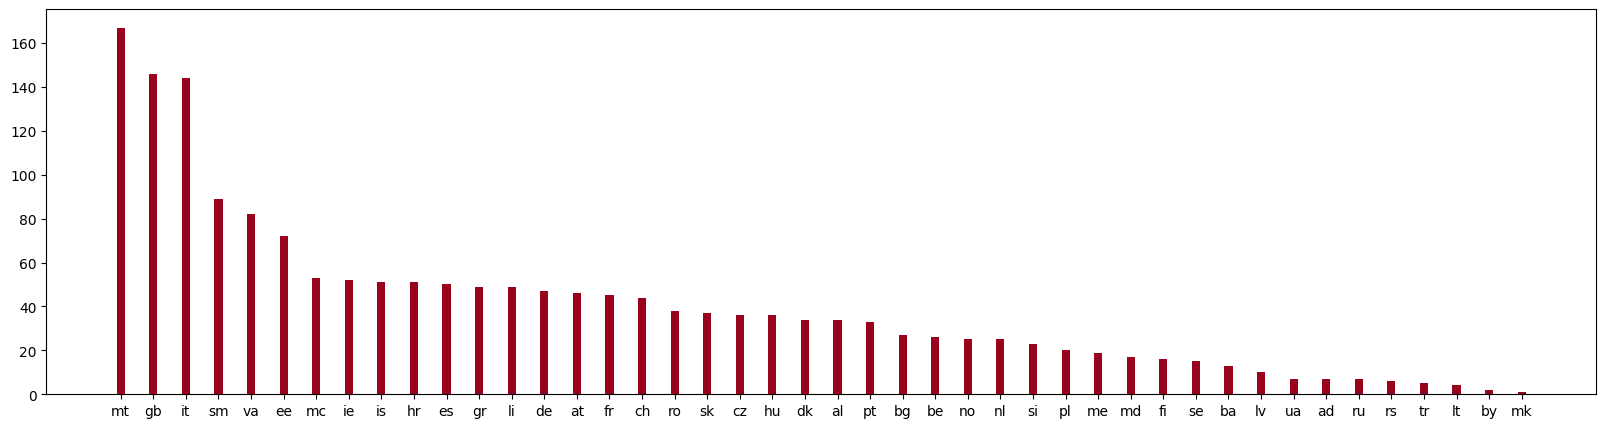

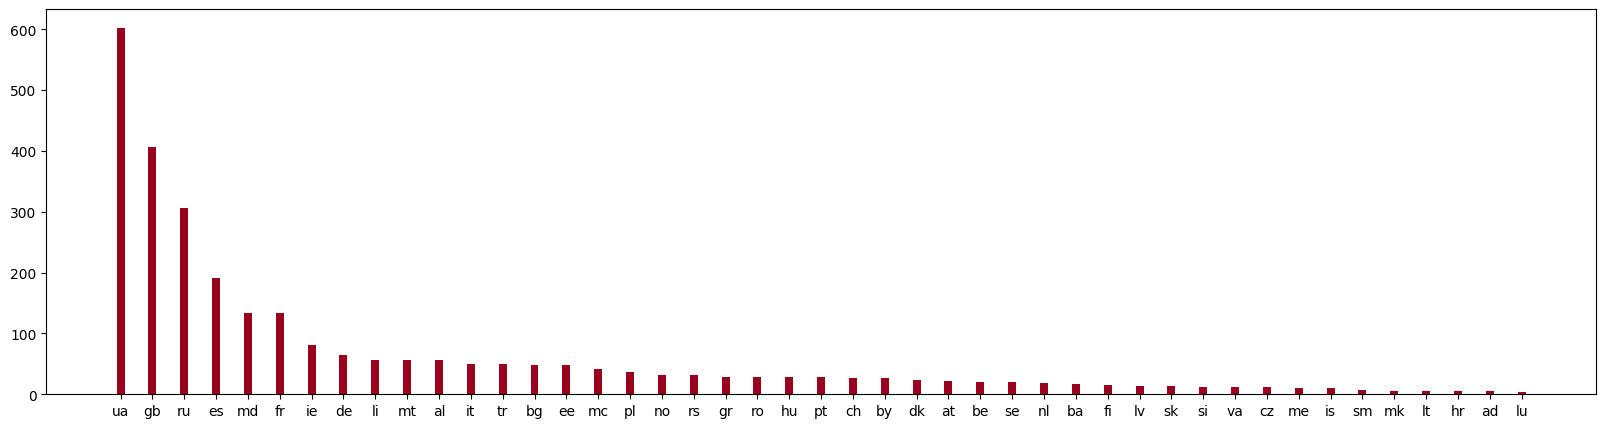

In [72]:
# plot EU

# travel

fig = plt.figure(figsize = (20, 5))

# bar width
bar_width = 0.25

x1 = list(df_travel_eu_grouped['destination_country'])

y1 = np.array(df_travel_eu_grouped['count_destination_country'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('EU/travel_eu_destination.png')


# politics

fig = plt.figure(figsize = (20, 5))

# bar width
bar_width = 0.25

x1 = list(df_politics_eu_grouped['destination_country'])

y1 = np.array(df_politics_eu_grouped['count_destination_country'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('EU/politics_eu_destination.png')

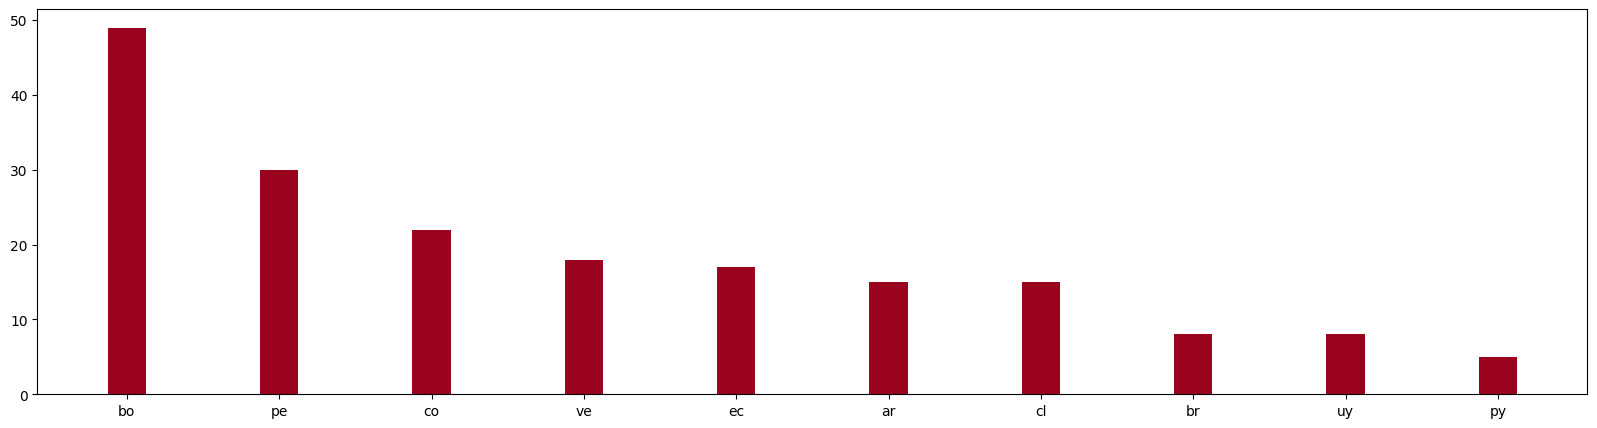

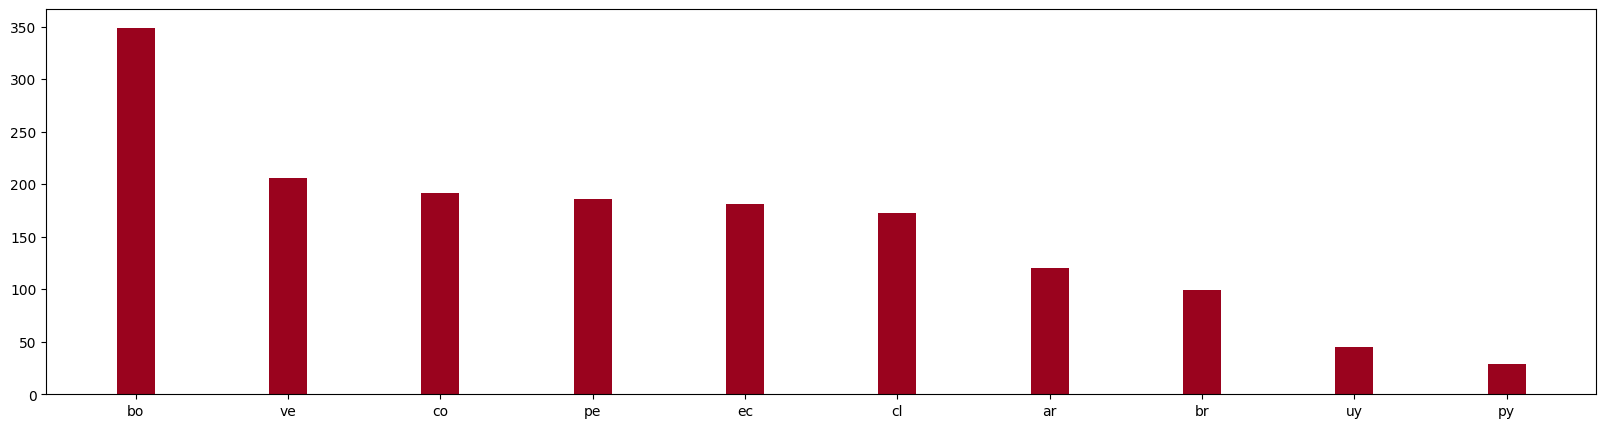

In [73]:
# plot SA

# travel

fig = plt.figure(figsize = (20, 5))

# bar width
bar_width = 0.25

x1 = list(df_travel_sa_grouped['destination_country'])

y1 = np.array(df_travel_sa_grouped['count_destination_country'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('SA/travel_sa_destination.png')


# politics

fig = plt.figure(figsize = (20, 5))

# bar width
bar_width = 0.25

x1 = list(df_politics_sa_grouped['destination_country'])

y1 = np.array(df_politics_sa_grouped['count_destination_country'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('SA/politics_sa_destination.png')

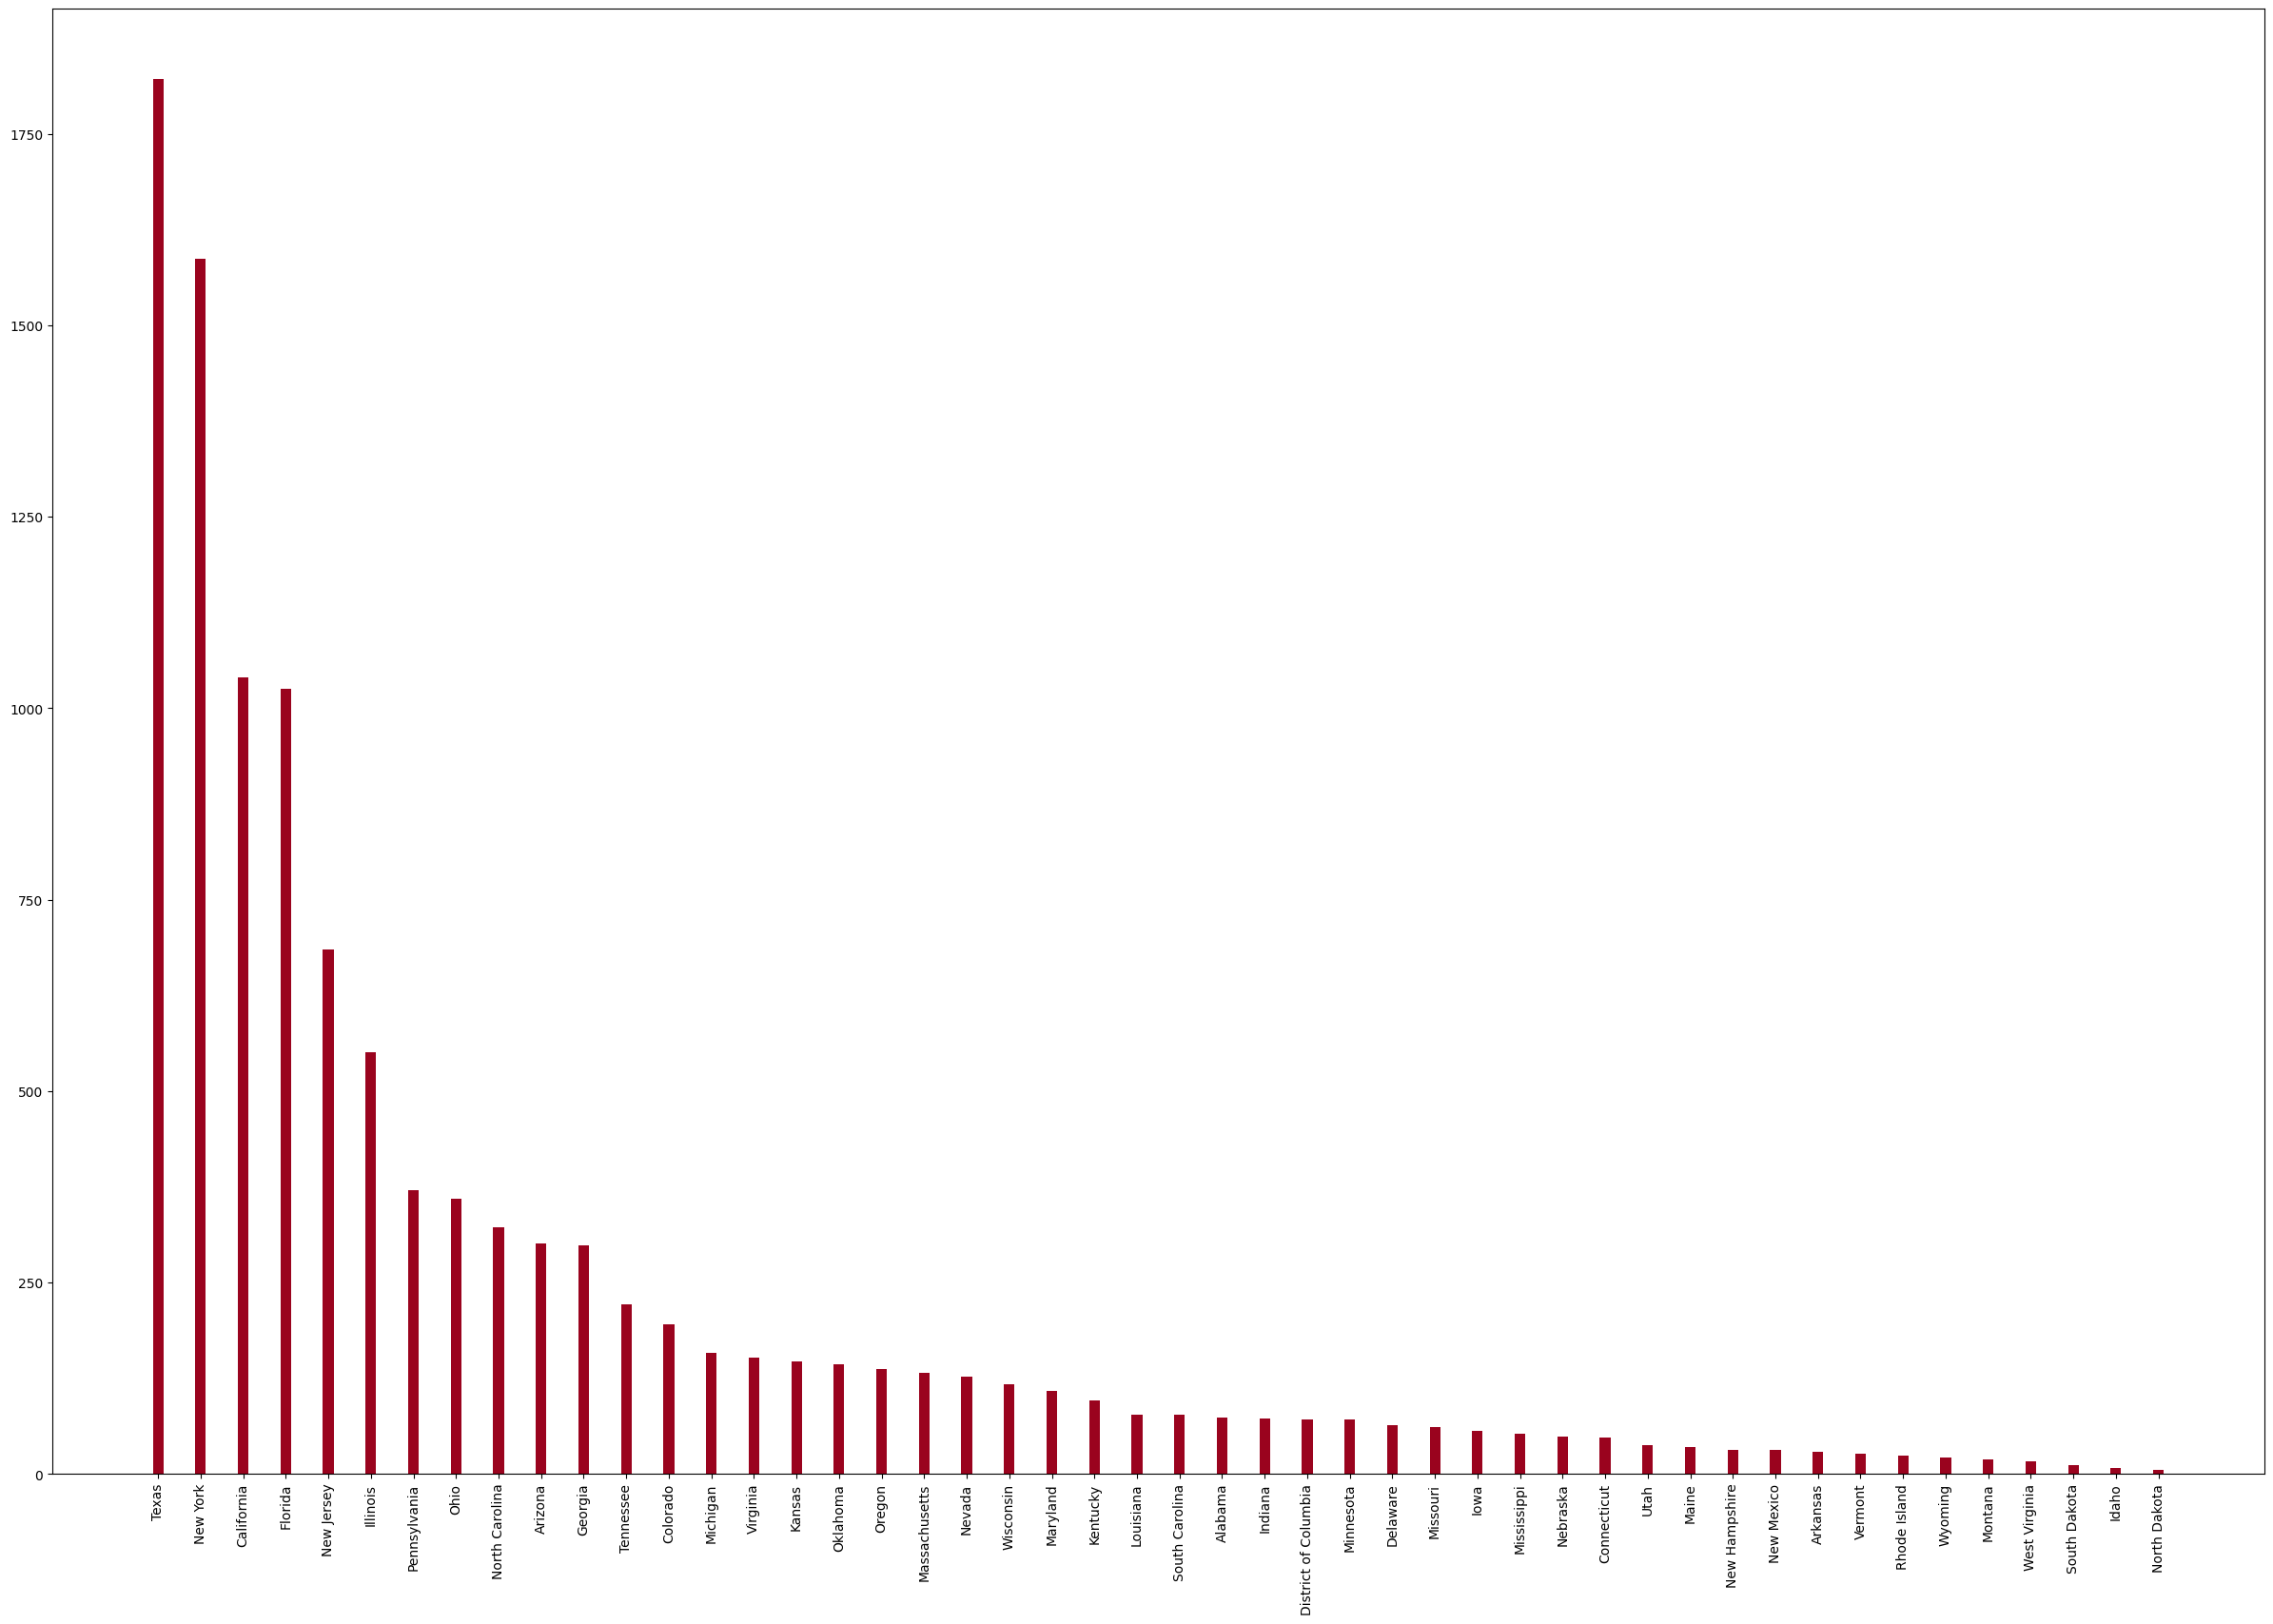

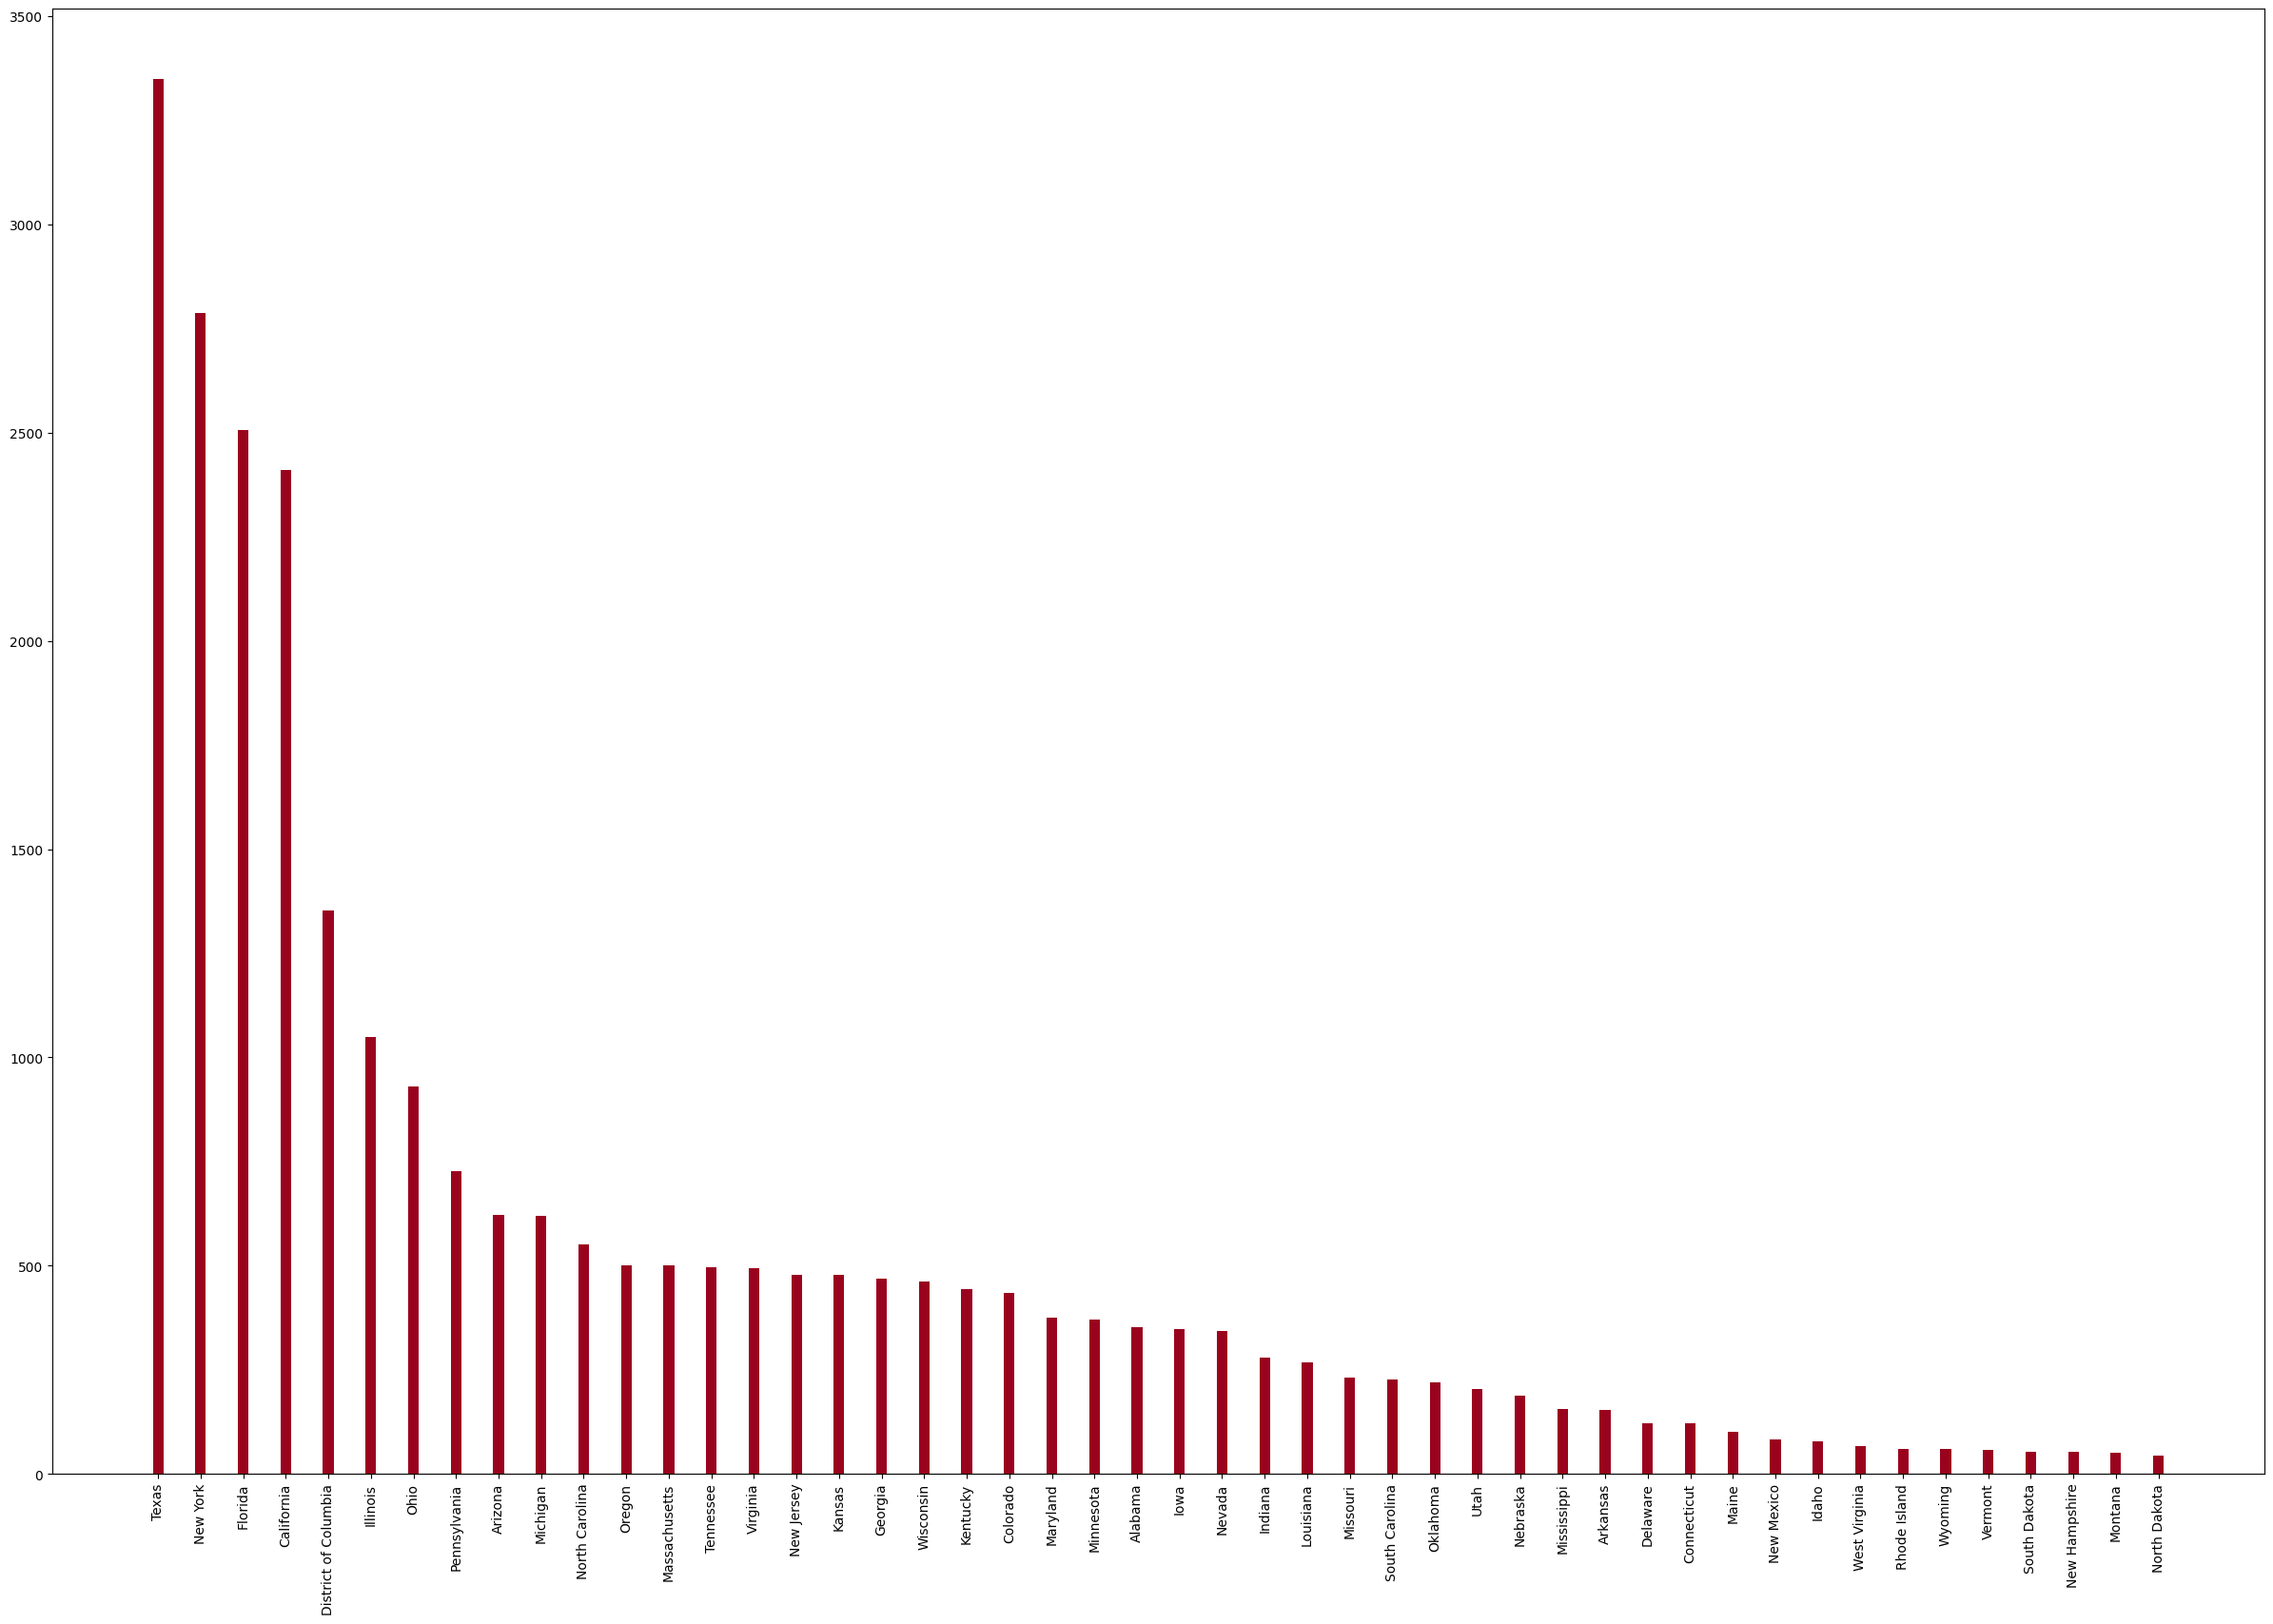

In [74]:
# plot US

# travel

fig = plt.figure(figsize = (30, 20))

# bar width
bar_width = 0.25

x1 = list(df_travel_us_grouped['destination_state'])

y1 = np.array(df_travel_us_grouped['count_destination_state'])

# creating the bar plot
plt.xticks(rotation=90)
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('US/travel_us_destination.png')


# politics

fig = plt.figure(figsize = (30, 20))

# bar width
bar_width = 0.25

x1 = list(df_politics_us_grouped['destination_state'])

y1 = np.array(df_politics_us_grouped['count_destination_state'])

# creating the bar plot
plt.xticks(rotation=90)
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('US/politics_us_destination.png')

### Check which countries mention in different topics

#### Group by source country

In [77]:
# remove extra states US

merged_us = merged_us[~merged_us['state_x'].isin(['United States Virgin Islands', 'American Samoa'])]

In [78]:
merged_eu

,Unnamed: 0,tweet id,text,text_no_loc,lang,place_country,country_code,cleaned_text_x,cleaned_text_y,topic_num,topic_num_forced,topic_num_prob,topic_num_distr,topic_num_c_tf_idf,topic_num_embeddings
0,0,1.181824e+18,Early morning walk be breakfast around the stu...,Early morning walk be breakfast around the stu...,en,HR,hr,early morning walk be breakfast around the stu...,early morning walk be breakfast around the stu...,58,58,58,58,58,58
1,1,1.564693e+18,"@LeaMaric I am. It's the end of it, so I'm enj...","@LeaMaric I am. It's the end of it, so I'm enj...",en,HR,ch,"i am. it's the end of it, so i'm enjoying the ...","i am. it's the end of it, so i'm enjoying the ...",-1,46,10,46,46,10
2,2,1.118089e+18,Drop dead gorgeous #Hrvatska #Croatia #Zagreb....,Drop dead gorgeous # # # . https://t.co/zqzy...,en,HR,hr,drop dead gorgeous .,drop dead gorgeous .,52,52,52,52,52,52
3,3,1.399343e+18,Summer stories await🌿 🌊 #ljetoincroatia @ Dubr...,"Summer stories await🌿 🌊 #ljetoincroatia @ , ...",en,HR,hr,"summer stories await ljetoincroatia ,","summer stories await ljetoincroatia ,",33,33,33,33,33,33
4,4,1.126602e+18,"Day 9 - ""If it ain't raining, it ain't trainin...","Day 9 - ""If it ain't raining, it ain't trainin...",en,HR,hr,"day - ""if it ain't raining, it ain't training""...","day - ""if it ain't raining, it ain't training""...",17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46060,61671,1.506981e+18,"I’m at the Ukrainian border in Palanca, Moldov...","I’m at the border in , . This is looking i...",en,MD,ro,"im at the border in , . this is looking into ....","im at the border in , . this is looking into ....",-1,35,64,35,35,3
46061,61674,1.506903e+18,"Thanks to UNICEF Goodwill Ambassador, Orlando ...","Thanks to UNICEF Goodwill Ambassador, Orlando ...",en,MD,md,"thanks to unicef goodwill ambassador, orlando ...","thanks to unicef goodwill ambassador, orlando ...",35,35,35,35,35,35
46062,61676,1.506876e+18,@tbadger971 @Rogozin Two wrongs don't make it ...,@tbadger971 @Rogozin Two wrongs don't make it ...,en,MD,ru,"two wrongs don't make it right, for sure. but ...","two wrongs don't make it right, for sure. but ...",-1,5,5,5,3,5
46063,61677,1.506768e+18,Very good meeting with the Minister of Culture...,Very good meeting with the Minister of Culture...,en,MD,md,very good meeting with the minister of culture...,very good meeting with the minister of culture...,35,35,35,35,35,35


In [79]:
# destinatio country = country_code column
grouped_eu = merged_eu.groupby(by=['place_country', 'topic_num']).agg(topic_num=pd.NamedAgg(column='topic_num', aggfunc='first'), source_country=pd.NamedAgg(column='place_country', aggfunc='first'), count_source_country=pd.NamedAgg(column='place_country', aggfunc='count')).reset_index(drop=True)
grouped_sa = merged_sa.groupby(by=['place_country', 'topic_num']).agg(topic_num=pd.NamedAgg(column='topic_num', aggfunc='first'), source_country=pd.NamedAgg(column='place_country', aggfunc='first'), count_source_country=pd.NamedAgg(column='place_country', aggfunc='count')).reset_index(drop=True)
grouped_us = merged_us.groupby(by=['state_y', 'topic_num']).agg(topic_num=pd.NamedAgg(column='topic_num', aggfunc='first'), source_state=pd.NamedAgg(column='state_y', aggfunc='first'), count_source_state=pd.NamedAgg(column='state_y', aggfunc='count')).reset_index(drop=True)

#### Plot macro-topics we are interested in

In [83]:
# travel/transportation topics EU
travel_eu = [12, 18, 25, 32, 36, 41, 46, 53] # from 12 to 46 -> travel | from 3 to 64 -> politics , 3, 5, 35, 48, 54, 55, 56, 61, 64
# travel/transportation topics EU
travel_sa = [25, 29, 45] # from 25 to 45 -> travel | from 0 to 52 -> politics , 0, 13, 18, 31, 36, 48, 50, 52
# travel/transportation topics EU
travel_us = [9, 11, 12, 41, 44, 69, 112, 127, 17, 19, 22, 34, 61, 85, 121] # from 9 to 127 -> travel | from 17 to 121 -> accidents | from 0 to 110 -> politics , 0, 1, 27, 60, 66, 70, 72, 73, 81, 87, 90, 91, 95, 101, 104, 107, 110

# politics EU
politics_eu = [3, 5, 35, 48, 54, 55, 56, 61, 64] # from 3 to 64 -> politics | from 12 to 46 -> travel
# politics SA
politics_sa = [0, 13, 18, 31, 36, 48, 50, 52] # from 0 to 52 -> politics | from 25 to 45 -> travel
# politics US
politics_us = [0, 1, 27, 60, 66, 70, 72, 73, 81, 87, 90, 91, 95, 101, 104, 107, 110] # from 0 to 110 -> politics | from 9 to 127 -> travel | from 17 to 121 -> accidents

# extract topics
# travel
df_travel_eu = grouped_eu[grouped_eu['topic_num'].isin(travel_eu)]
# group by country
df_travel_eu_grouped = df_travel_eu.groupby(by=['source_country']).agg(source_country=pd.NamedAgg(column='source_country', aggfunc='first'), count_source_country=pd.NamedAgg(column='count_source_country', aggfunc='sum')).reset_index(drop=True)
df_travel_eu_grouped = df_travel_eu_grouped.sort_values(by='count_source_country', ascending=False)
# politics
df_politics_eu = grouped_eu[grouped_eu['topic_num'].isin(politics_eu)]
# group by country
df_politics_eu_grouped = df_politics_eu.groupby(by=['source_country']).agg(source_country=pd.NamedAgg(column='source_country', aggfunc='first'), count_source_country=pd.NamedAgg(column='count_source_country', aggfunc='sum')).reset_index(drop=True)
df_politics_eu_grouped = df_politics_eu_grouped.sort_values(by='count_source_country', ascending=False)


# extract topics
# travel
df_travel_sa = grouped_sa[grouped_sa['topic_num'].isin(travel_sa)]
# group by country
df_travel_sa_grouped = df_travel_sa.groupby(by=['source_country']).agg(source_country=pd.NamedAgg(column='source_country', aggfunc='first'), count_source_country=pd.NamedAgg(column='count_source_country', aggfunc='sum')).reset_index(drop=True)
df_travel_sa_grouped = df_travel_sa_grouped.sort_values(by='count_source_country', ascending=False)
#politics
df_politics_sa = grouped_sa[grouped_sa['topic_num'].isin(politics_sa)]
# group by country
df_politics_sa_grouped = df_politics_sa.groupby(by=['source_country']).agg(source_country=pd.NamedAgg(column='source_country', aggfunc='first'), count_source_country=pd.NamedAgg(column='count_source_country', aggfunc='sum')).reset_index(drop=True)
df_politics_sa_grouped = df_politics_sa_grouped.sort_values(by='count_source_country', ascending=False)



# extract topics
df_travel_us = grouped_us[grouped_us['topic_num'].isin(travel_us)]
# group by country
df_travel_us_grouped = df_travel_us.groupby(by=['source_state']).agg(source_state=pd.NamedAgg(column='source_state', aggfunc='first'), count_source_state=pd.NamedAgg(column='count_source_state', aggfunc='sum')).reset_index(drop=True)
df_travel_us_grouped = df_travel_us_grouped.sort_values(by='count_source_state', ascending=False)
# politics
df_politics_us = grouped_us[grouped_us['topic_num'].isin(politics_us)]
# group by country
df_politics_us_grouped = df_politics_us.groupby(by=['source_state']).agg(source_state=pd.NamedAgg(column='source_state', aggfunc='first'), count_source_state=pd.NamedAgg(column='count_source_state', aggfunc='sum')).reset_index(drop=True)
df_politics_us_grouped = df_politics_us_grouped.sort_values(by='count_source_state', ascending=False)

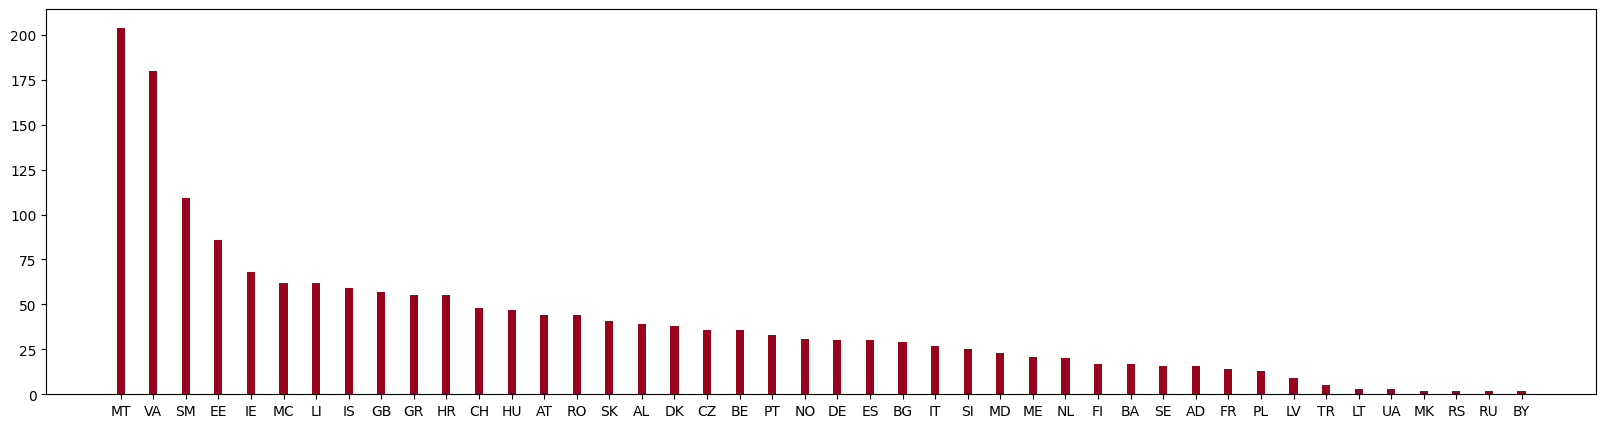

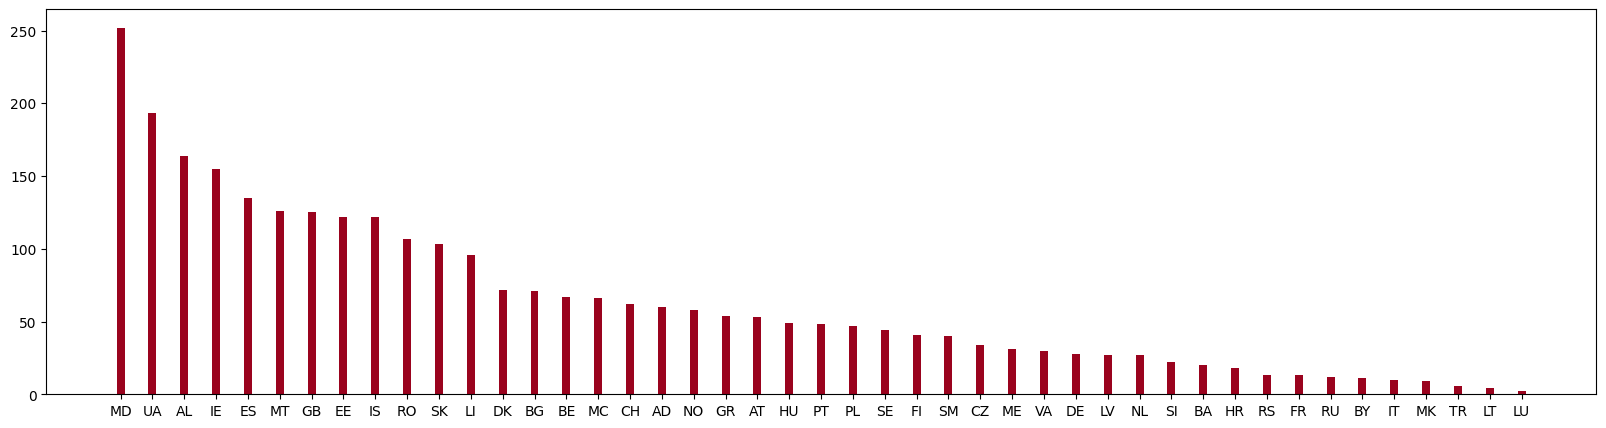

In [84]:
# plot EU

# travel

fig = plt.figure(figsize = (20, 5))

# bar width
bar_width = 0.25

x1 = list(df_travel_eu_grouped['source_country'])

y1 = np.array(df_travel_eu_grouped['count_source_country'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('EU/travel_eu_source.png')


# politics

fig = plt.figure(figsize = (20, 5))

# bar width
bar_width = 0.25

x1 = list(df_politics_eu_grouped['source_country'])

y1 = np.array(df_politics_eu_grouped['count_source_country'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('EU/politics_eu_source.png')

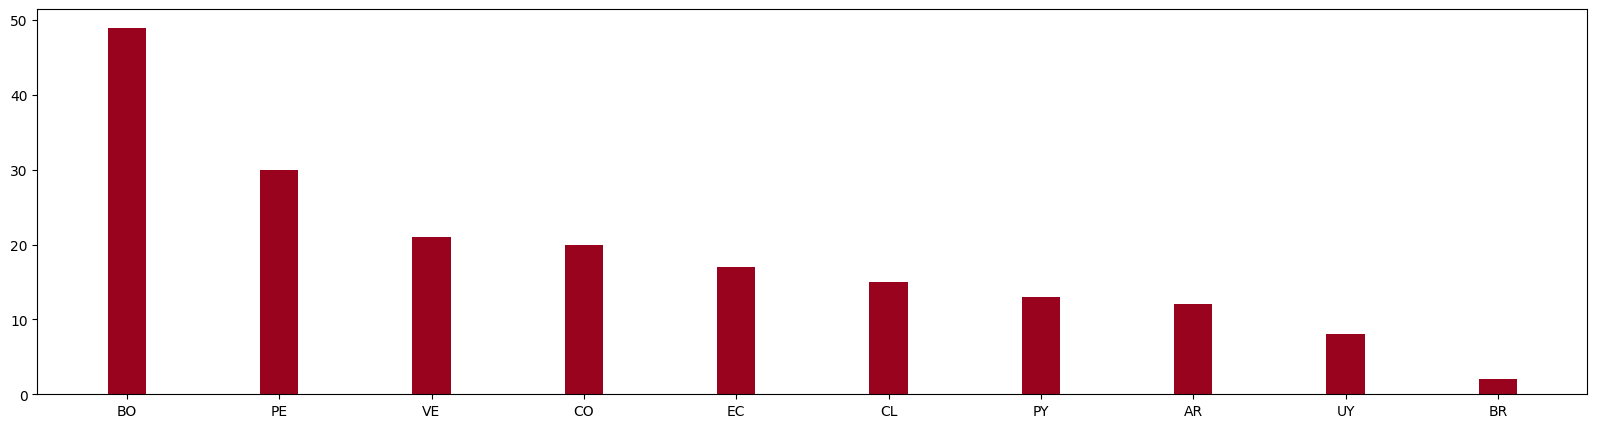

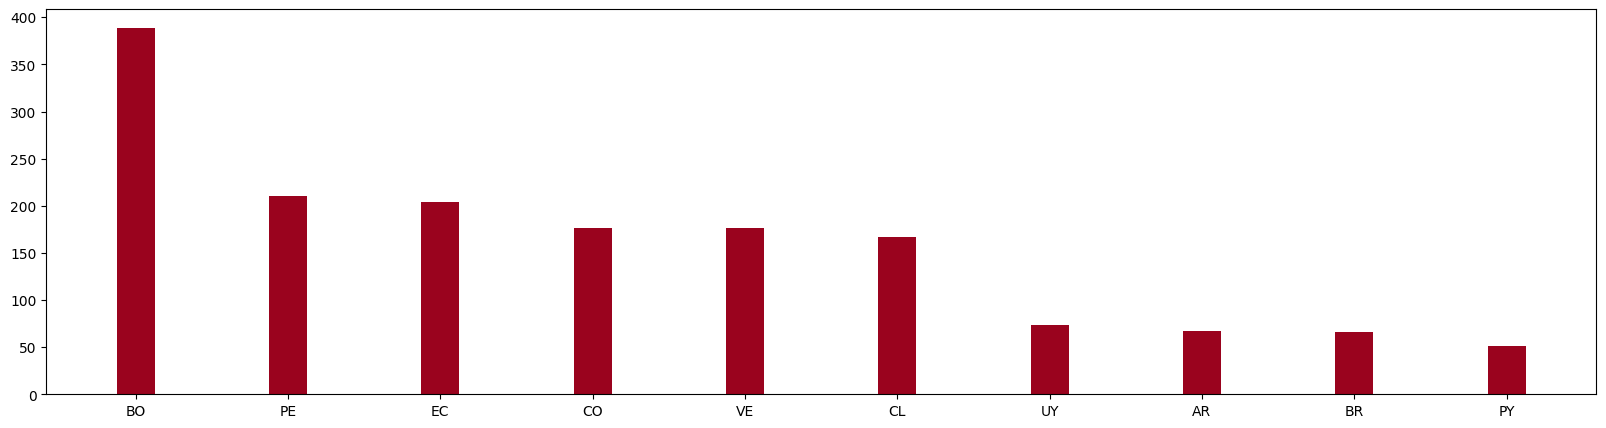

In [96]:
# plot SA

# travel

fig = plt.figure(figsize = (20, 5))

# bar width
bar_width = 0.25

x1 = list(df_travel_sa_grouped['source_country'])

y1 = np.array(df_travel_sa_grouped['count_source_country'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('SA/travel_sa_source.png')


# politics

fig = plt.figure(figsize = (20, 5))

# bar width
bar_width = 0.25

x1 = list(df_politics_sa_grouped['source_country'])

y1 = np.array(df_politics_sa_grouped['count_source_country'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('SA/politics_sa_source.png')

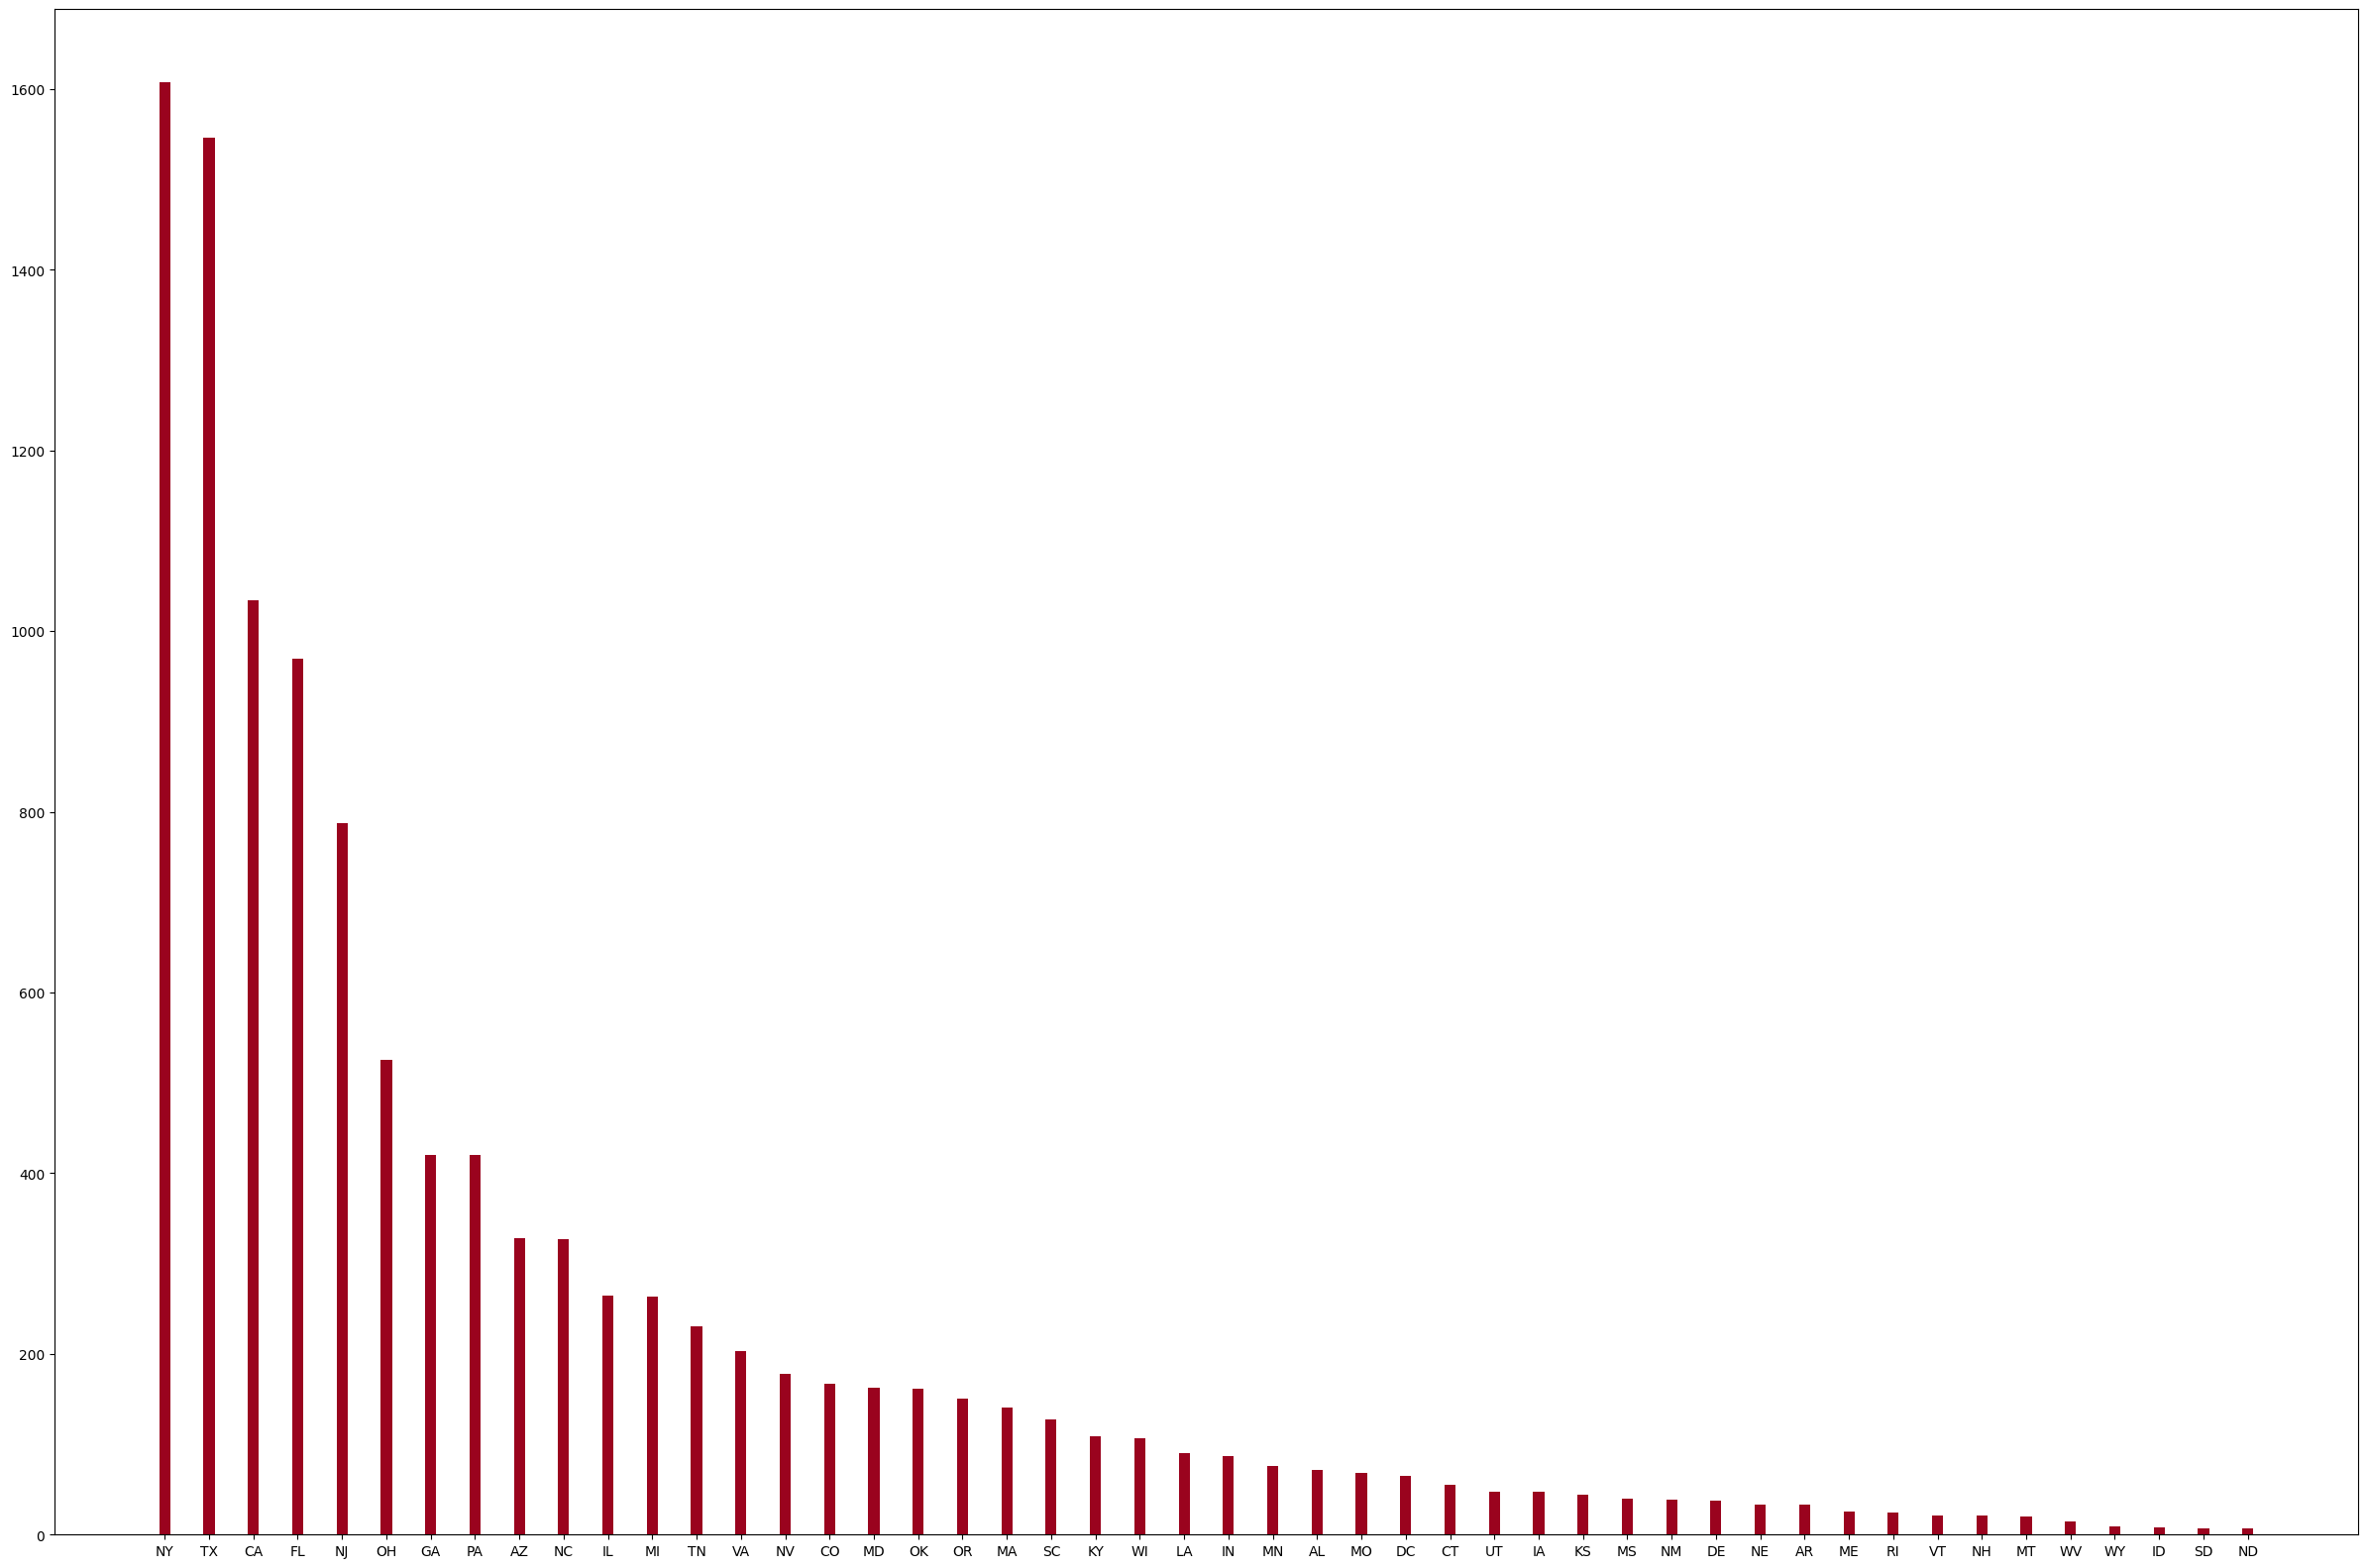

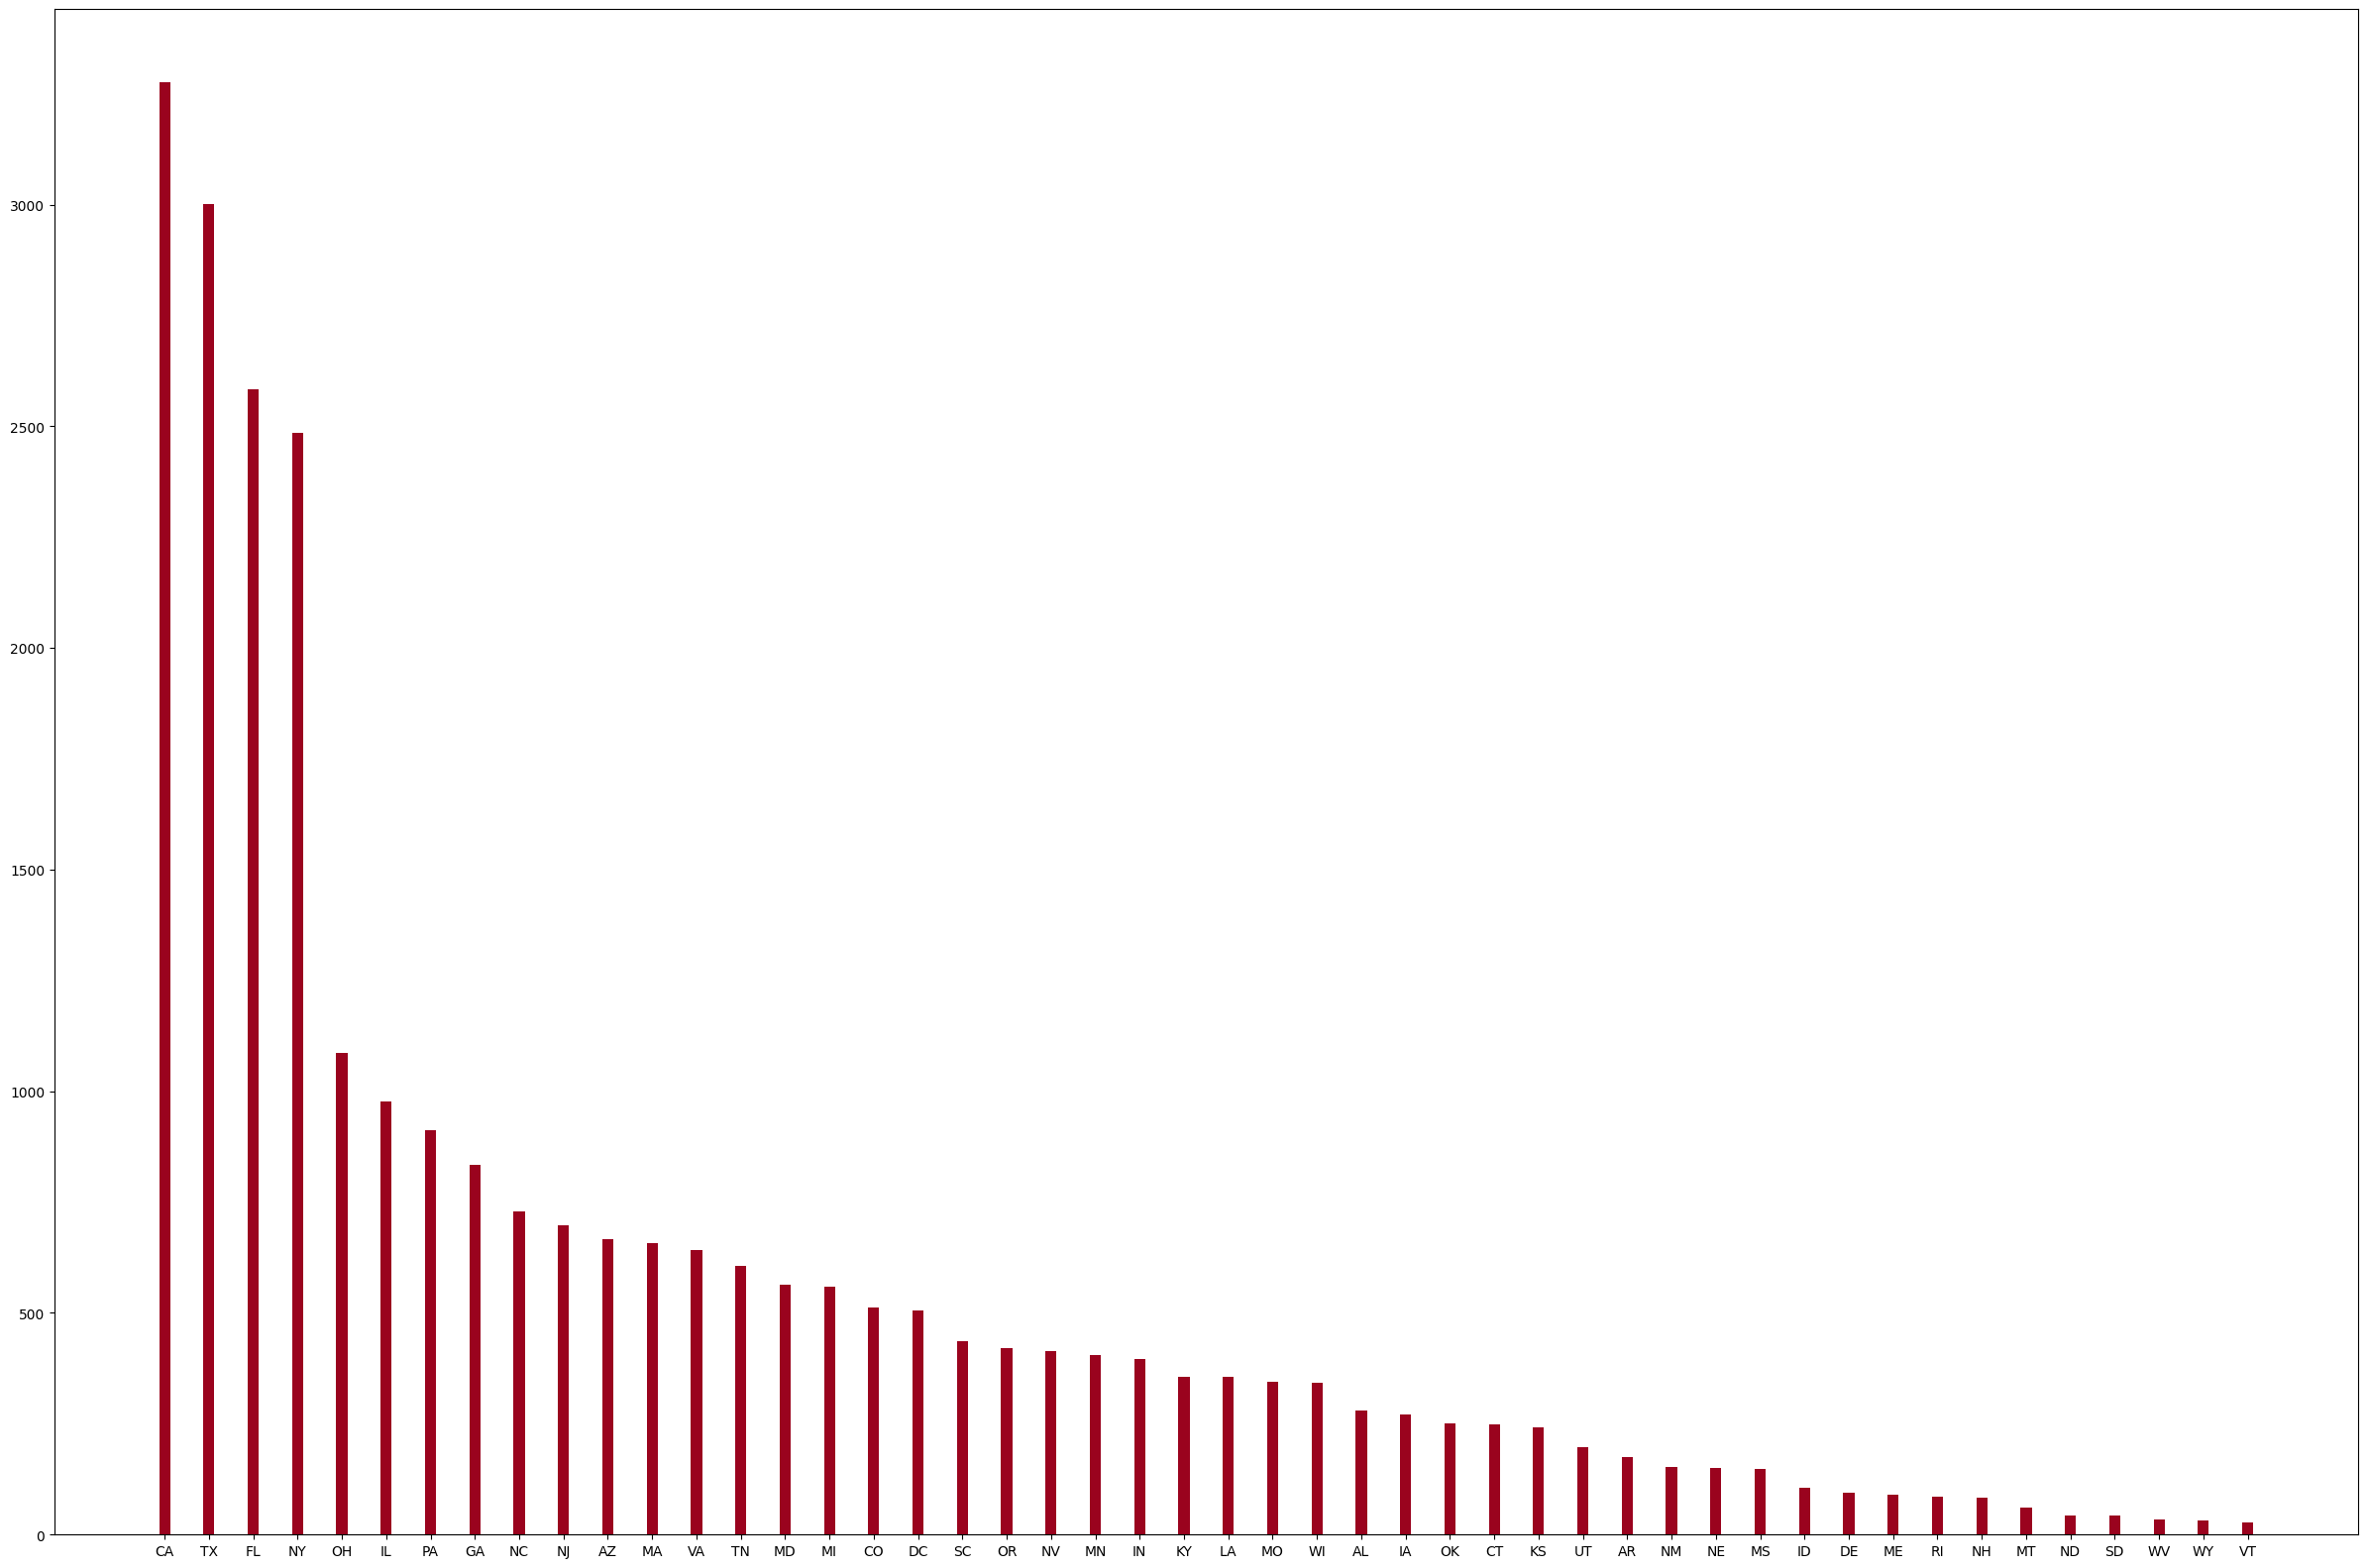

In [101]:
# plot US

# travel

fig = plt.figure(figsize = (30, 20))

# bar width
bar_width = 0.25

x1 = list(df_travel_us_grouped['source_state'])

y1 = np.array(df_travel_us_grouped['count_source_state'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('US/travel_us_source.png')


# politics

fig = plt.figure(figsize = (30, 20))

# bar width
bar_width = 0.25

x1 = list(df_politics_us_grouped['source_state'])

y1 = np.array(df_politics_us_grouped['count_source_state'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('US/politics_us_source.png')

### Brexit and Ukrainian-Russian war

#### Destination

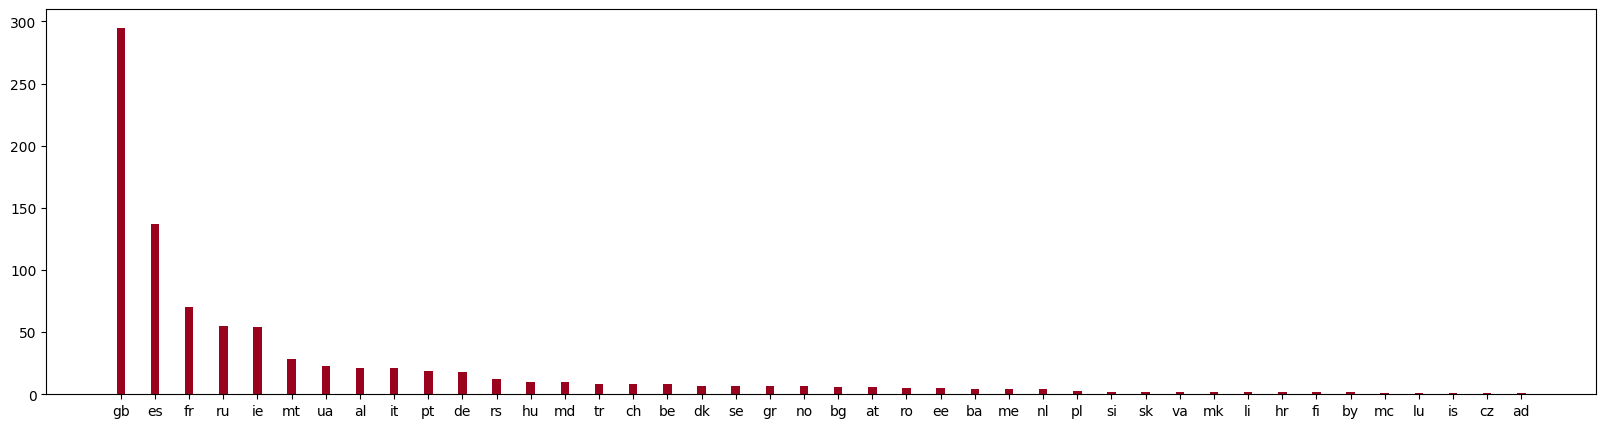

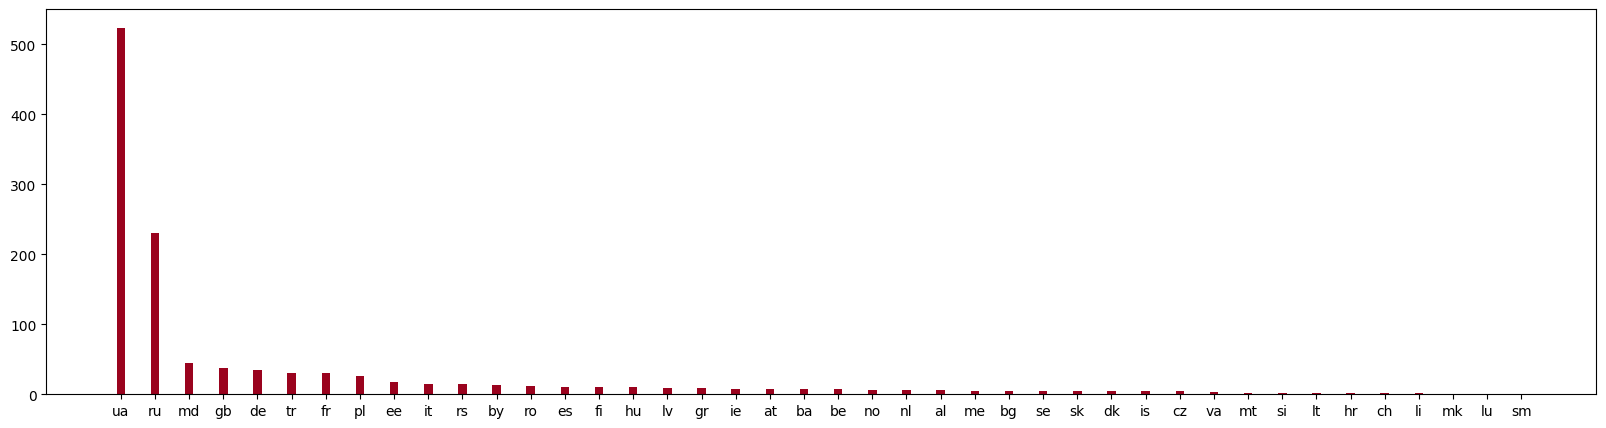

In [103]:
# brexit topic
brexit_eu = 5
# war topic
war_topic = 3


# group by destination
grouped_eu = merged_eu.groupby(by=['country_code', 'topic_num']).agg(topic_num=pd.NamedAgg(column='topic_num', aggfunc='first'), destination_country=pd.NamedAgg(column='country_code', aggfunc='first'), count_destination_country=pd.NamedAgg(column='country_code', aggfunc='count')).reset_index(drop=True)
# brexit
df_brexit_eu = grouped_eu[grouped_eu['topic_num'] == brexit_eu]
# group by country
df_brexit_eu_grouped = df_brexit_eu.groupby(by=['destination_country']).agg(destination_country=pd.NamedAgg(column='destination_country', aggfunc='first'), count_destination_country=pd.NamedAgg(column='count_destination_country', aggfunc='sum')).reset_index(drop=True)
df_brexit_eu_grouped = df_brexit_eu_grouped.sort_values(by='count_destination_country', ascending=False)
# war
df_war_eu = grouped_eu[grouped_eu['topic_num'] == war_topic]
# group by country
df_war_eu_grouped = df_war_eu.groupby(by=['destination_country']).agg(destination_country=pd.NamedAgg(column='destination_country', aggfunc='first'), count_destination_country=pd.NamedAgg(column='count_destination_country', aggfunc='sum')).reset_index(drop=True)
df_war_eu_grouped = df_war_eu_grouped.sort_values(by='count_destination_country', ascending=False)


# brexit plot

fig = plt.figure(figsize = (20, 5))

# bar width
bar_width = 0.25

x1 = list(df_brexit_eu_grouped['destination_country'])

y1 = np.array(df_brexit_eu_grouped['count_destination_country'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('EU/brexit_eu_destination.png')


# war plot

fig = plt.figure(figsize = (20, 5))

# bar width
bar_width = 0.25

x1 = list(df_war_eu_grouped['destination_country'])

y1 = np.array(df_war_eu_grouped['count_destination_country'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('EU/war_eu_destination.png')

#### Source

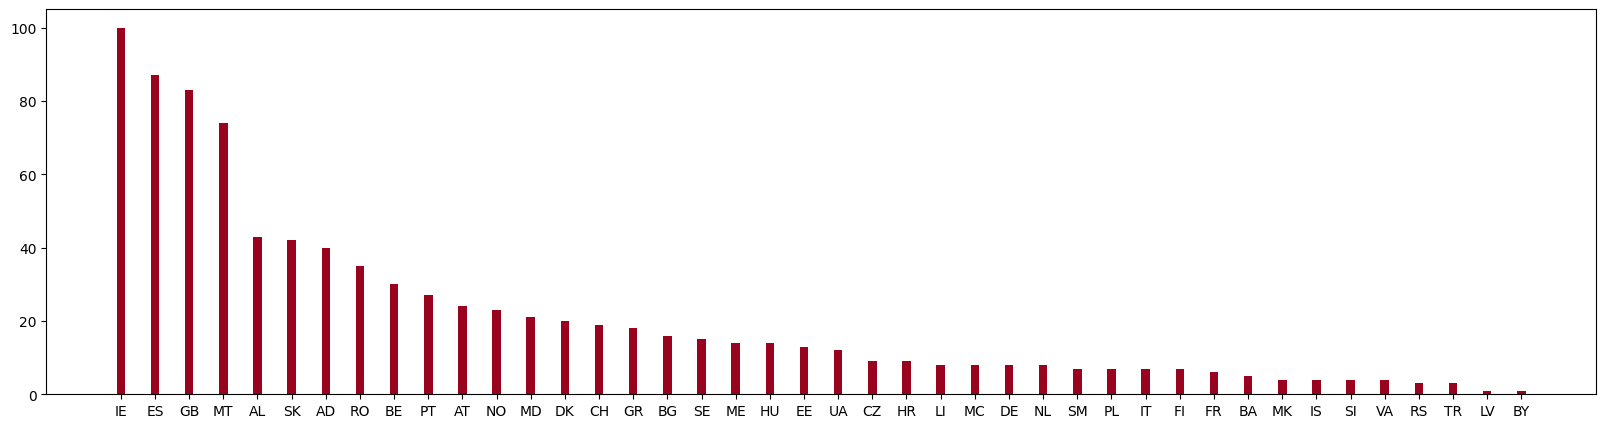

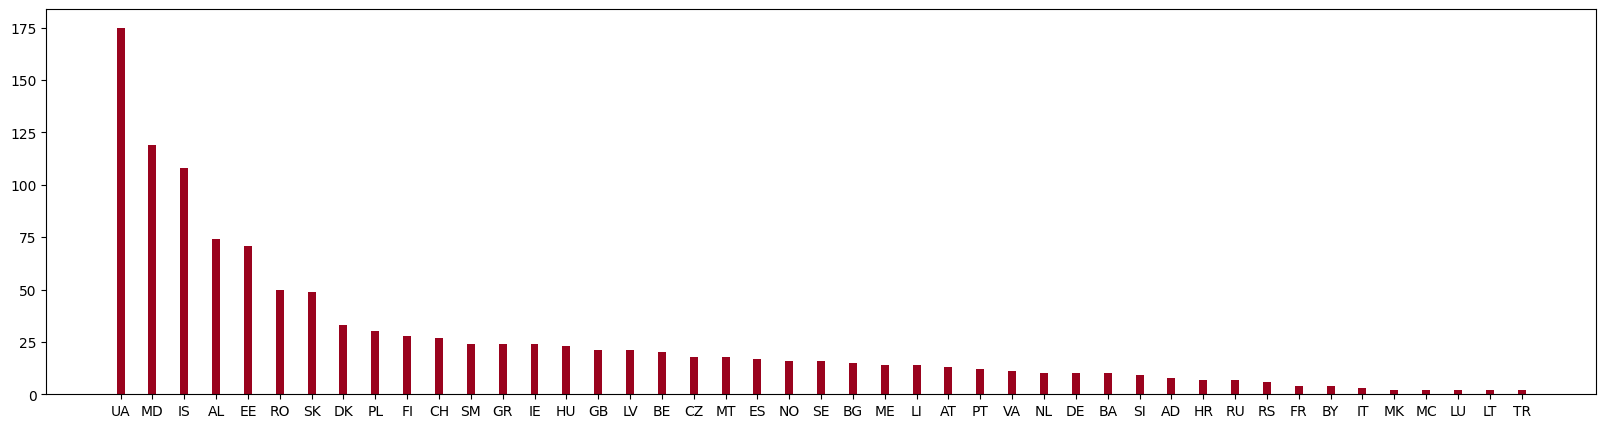

In [105]:
# group by source
grouped_eu = merged_eu.groupby(by=['place_country', 'topic_num']).agg(topic_num=pd.NamedAgg(column='topic_num', aggfunc='first'), source_country=pd.NamedAgg(column='place_country', aggfunc='first'), count_source_country=pd.NamedAgg(column='place_country', aggfunc='count')).reset_index(drop=True)
# brexit
df_brexit_eu = grouped_eu[grouped_eu['topic_num'] == brexit_eu]
# group by country
df_brexit_eu_grouped = df_brexit_eu.groupby(by=['source_country']).agg(source_country=pd.NamedAgg(column='source_country', aggfunc='first'), count_source_country=pd.NamedAgg(column='count_source_country', aggfunc='sum')).reset_index(drop=True)
df_brexit_eu_grouped = df_brexit_eu_grouped.sort_values(by='count_source_country', ascending=False)
# war
df_war_eu = grouped_eu[grouped_eu['topic_num'] == war_topic]
# group by country
df_war_eu_grouped = df_war_eu.groupby(by=['source_country']).agg(source_country=pd.NamedAgg(column='source_country', aggfunc='first'), count_source_country=pd.NamedAgg(column='count_source_country', aggfunc='sum')).reset_index(drop=True)
df_war_eu_grouped = df_war_eu_grouped.sort_values(by='count_source_country', ascending=False)


# brexit plot

fig = plt.figure(figsize = (20, 5))

# bar width
bar_width = 0.25

x1 = list(df_brexit_eu_grouped['source_country'])

y1 = np.array(df_brexit_eu_grouped['count_source_country'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('EU/brexit_eu_source.png')


# war plot

fig = plt.figure(figsize = (20, 5))

# bar width
bar_width = 0.25

x1 = list(df_war_eu_grouped['source_country'])

y1 = np.array(df_war_eu_grouped['count_source_country'])

# creating the bar plot
plt.bar(x1, y1, color ='#9a031e', width = bar_width, label='Europe')

plt.savefig('EU/war_eu_source.png')

### Create matrix of normalized flows by removing one topic at time

#### Matrices of normal flows and normalized flows

In [ ]:
cwd = Path.cwd()
parent_dir = cwd.parent.parent

In [133]:
norm_fluxes_eu = pd.read_csv(parent_dir / 'Data' / 'Europe' / 'fluxes_0.5_norm_day_ok.csv')
fluxes_eu = pd.read_csv(parent_dir / 'Data' / 'Europe' / 'matrix_fluxes_0.5_no_self_loops.csv')
fluxes_eu = fluxes_eu.drop(columns=['Unnamed: 0'])
# add country index
norm_fluxes_eu.index = norm_fluxes_eu.columns
fluxes_eu.index = fluxes_eu.columns

norm_fluxes_sa = pd.read_csv(parent_dir / 'Data' / 'South America' / 'fluxes_0.5_norm_day okok.csv')
fluxes_sa = pd.read_csv(parent_dir / 'Data' / 'South America' / 'matrix_fluxes_0.5_no_self_loops.csv')
fluxes_sa = fluxes_sa.drop(columns=['Unnamed: 0'])
# add country index
norm_fluxes_sa.index = norm_fluxes_sa.columns
fluxes_sa.index = fluxes_sa.columns

norm_fluxes_us = pd.read_csv(parent_dir / 'Data' / 'US' / 'fluxes_0.5_norm_day no wa.csv')
fluxes_us = pd.read_csv(parent_dir / 'Data' / 'US' / 'matrix_fluxes_0.5_no_self_loops no wa.csv')
fluxes_us = fluxes_us.drop(columns=['Unnamed: 0'])
# add country index
norm_fluxes_us.index = norm_fluxes_us.columns
fluxes_us.index = fluxes_us.columns

#### Topics - tweets

In [134]:
topics_eu = pd.read_csv('EU/merged_EU.csv')
topics_sa = pd.read_csv('SA/merged_SA.csv')
topics_us = pd.read_csv('US/merged_US.csv')

In [135]:
topics_us

,index,Unnamed: 0,tweet id,text,text_no_loc,lang,state_y,state_x,country_code,cleaned_text_x,cleaned_text_y,topic_num,topic_num_forced,topic_num_prob,topic_num_distr,topic_num_c_tf_idf,topic_num_embeddings
0,0,2,1.193717e+18,@obsmchat Hello Jeanine Sherman from Michigan....,@obsmchat Hello Jeanine Sherman from . #iamab...,en,MI,Michigan,us,hello jeanine sherman from . iamabariatricpati...,hello jeanine sherman from . iamabariatricpati...,-1,64,23,64,64,23
1,1,3,1.326026e+18,Police activity in #Wayne on I-96 Local WB aft...,Police activity in # on I-96 Local WB after M...,en,MI,Illinois,us,police activity in on i-96 local wb after m-3...,police activity in on i-96 local wb after m-3...,34,34,34,34,34,34
2,2,4,1.397695e+18,Good to see Randolph again.... yes I know he's...,Good to see again.... yes I know he's not in...,en,MI,Illinois,us,good to see again.... yes i know he's not in t...,good to see again.... yes i know he's not in t...,7,7,7,7,7,7
3,3,6,1.397695e+18,"@itbesleazy DI Downriver, weekly in SE Michiga...","@itbesleazy DI Downriver, weekly in that j...",en,MI,Michigan,us,"di downriver, weekly in that just started back...","di downriver, weekly in that just started back...",-1,122,11,122,122,43
4,4,7,1.397695e+18,@_ZachShaw @SamWebb77 G League or Ann Arbor? I...,@_ZachShaw @SamWebb77 G League or ? It’s simp...,en,MI,Michigan,us,g league or ? its simple! come back 1,g league or ? its simple! come back 1,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187291,247994,338811,1.519523e+18,"My 5th state of the week, the Green Mountain S...","My 5th state of the week, the State of .\n#...",en,VT,Vermont,us,"my th state of the week, the state of . state...","my th state of the week, the state of . state...",-1,43,32,43,43,32
187292,247995,338812,1.098542e+18,"At 5:58 AM EST, West Arlington [Bennington Co,...","At 5:58 AM EST, [ , ] WEATHERNET6 reports S...",en,VT,Vermont,us,"at :58 am est, [ , ] weathernet6 reports snow ...","at :58 am est, [ , ] weathernet6 reports snow ...",124,124,124,124,124,124
187293,247997,338816,1.180664e+18,@DustinTannerVT @MonsterMile How long was the ...,@DustinTannerVT @MonsterMile How long was the ...,en,VT,New Jersey,us,how long was the drive to and how long is your...,how long was the drive to and how long is your...,9,9,9,9,9,9
187294,247998,338817,1.146039e+18,Short trip in the #USA ⛰ #Vermont @ Lake Willo...,Short trip in the # ⛰ # @ https://t.co/dvQ...,en,VT,Vermont,us,short trip in the,short trip in the,41,41,41,41,41,41


#### Topics numbers we are interested in

##### Functions

In [145]:
# functions


def extract_subset_eu_sa(df_topics, num_topic, source_col, target_col):
    '''
    Given the df of topics, it returns the subset of a specific topic grouped by source and target country
    :param df_topics: topics df
    :param num_topic: topic number
    :param source_col: source country/state column
    :param target_col: target country/state column
    '''

    # subset of specific topic
    subset_topic = df_topics[df_topics['topic_num'].isin(num_topic)].reset_index()
    # upper case of target
    subset_topic[target_col] = subset_topic[target_col].str.upper()
    # group by source-target country
    grouped_topic = subset_topic.groupby(by=[source_col, target_col]).agg(topic_num=pd.NamedAgg(column='topic_num', aggfunc='first'), source_country=pd.NamedAgg(column=source_col, aggfunc='first'), target_country=pd.NamedAgg(column=target_col, aggfunc='first'), count_source_target_country=pd.NamedAgg(column=source_col, aggfunc='count')).reset_index(drop=True)

    return grouped_topic


def resize_flux(fluxes, norm_fluxes, grouped_topic_df, source_col, target_col, output_path_flux, output_path_norm_flux):
    '''
    Given a dataset with specific topic and countries mentioning others about it, it updates the fluxes matrix and return the updated normalized fluxes matrix
    :param fluxes: matrix of number of mentions between countries
    :param norm_fluxes: matrix of normalized number of mentions between countries
    :param grouped_topic_df: topics dataframe
    :param source_col: source country/state column --> 'source_country'
    :param target_col: target country/state column --> 'target_country'
    '''


    new_df_flux = fluxes.copy()
    new_df_norm = pd.DataFrame(0, index=norm_fluxes.index, columns=norm_fluxes.columns)

    for i in range(len(grouped_topic_df)):
        source = grouped_topic_df.at[i, source_col]
        target = grouped_topic_df.at[i, target_col]
        '''if source == 'ME':
            print(target)
            print(fluxes.at[source, target])
            print(grouped_topic_df.at[i, 'count_source_target_country'])'''
        if source != target:
            new_df_flux.at[source, target] = (fluxes.at[source, target] - grouped_topic_df.at[i, 'count_source_target_country'])

    for i in new_df_flux.index:
        for col in new_df_flux.columns:
            diff = new_df_flux.at[i, col]
            norm_value = norm_fluxes.at[i, col]
            flux_value = fluxes.at[i, col]
            if flux_value != 0:
                new_df_norm.at[i, col] = diff * norm_value / flux_value
    
    new_df_flux.to_csv(output_path_flux, index=False)
    new_df_norm.to_csv(output_path_norm_flux, index=False)

    return new_df_norm, new_df_flux

In [137]:
topics_eu

,Unnamed: 0,tweet id,text,text_no_loc,lang,place_country,country_code,cleaned_text_x,cleaned_text_y,topic_num,topic_num_forced,topic_num_prob,topic_num_distr,topic_num_c_tf_idf,topic_num_embeddings
0,0,1.181824e+18,Early morning walk be breakfast around the stu...,Early morning walk be breakfast around the stu...,en,HR,hr,early morning walk be breakfast around the stu...,early morning walk be breakfast around the stu...,58,58,58,58,58,58
1,1,1.564693e+18,"@LeaMaric I am. It's the end of it, so I'm enj...","@LeaMaric I am. It's the end of it, so I'm enj...",en,HR,ch,"i am. it's the end of it, so i'm enjoying the ...","i am. it's the end of it, so i'm enjoying the ...",-1,46,10,46,46,10
2,2,1.118089e+18,Drop dead gorgeous #Hrvatska #Croatia #Zagreb....,Drop dead gorgeous # # # . https://t.co/zqzy...,en,HR,hr,drop dead gorgeous .,drop dead gorgeous .,52,52,52,52,52,52
3,3,1.399343e+18,Summer stories await🌿 🌊 #ljetoincroatia @ Dubr...,"Summer stories await🌿 🌊 #ljetoincroatia @ , ...",en,HR,hr,"summer stories await ljetoincroatia ,","summer stories await ljetoincroatia ,",33,33,33,33,33,33
4,4,1.126602e+18,"Day 9 - ""If it ain't raining, it ain't trainin...","Day 9 - ""If it ain't raining, it ain't trainin...",en,HR,hr,"day - ""if it ain't raining, it ain't training""...","day - ""if it ain't raining, it ain't training""...",17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46060,61671,1.506981e+18,"I’m at the Ukrainian border in Palanca, Moldov...","I’m at the border in , . This is looking i...",en,MD,ro,"im at the border in , . this is looking into ....","im at the border in , . this is looking into ....",-1,35,64,35,35,3
46061,61674,1.506903e+18,"Thanks to UNICEF Goodwill Ambassador, Orlando ...","Thanks to UNICEF Goodwill Ambassador, Orlando ...",en,MD,md,"thanks to unicef goodwill ambassador, orlando ...","thanks to unicef goodwill ambassador, orlando ...",35,35,35,35,35,35
46062,61676,1.506876e+18,@tbadger971 @Rogozin Two wrongs don't make it ...,@tbadger971 @Rogozin Two wrongs don't make it ...,en,MD,ru,"two wrongs don't make it right, for sure. but ...","two wrongs don't make it right, for sure. but ...",-1,5,5,5,3,5
46063,61677,1.506768e+18,Very good meeting with the Minister of Culture...,Very good meeting with the Minister of Culture...,en,MD,md,very good meeting with the minister of culture...,very good meeting with the minister of culture...,35,35,35,35,35,35


In [156]:
# EU
war = [3]
brexit = [5]
vatican = [0]
war_bre_vat = [0, 3, 5]
# SA
elections = [0]
# US
trump = [0]
nigga = [1]

# EU
subset_war = extract_subset_eu_sa(topics_eu, war, 'place_country', 'country_code')
subset_brexit = extract_subset_eu_sa(topics_eu, brexit, 'place_country', 'country_code')
subset_vatican = extract_subset_eu_sa(topics_eu, vatican, 'place_country', 'country_code')
subset_war_bre_vat = extract_subset_eu_sa(topics_eu, war_bre_vat, 'place_country', 'country_code')

# SA
subset_elections = extract_subset_eu_sa(topics_sa, elections, 'place_country', 'country_code')

dir_output = directory + '/topics_flux/'

# EU
new_df_norm_war, new_df_flux_war = resize_flux(fluxes_eu, norm_fluxes_eu, subset_war, 'source_country', 'target_country', dir_output + 'EU/war_flux.csv', dir_output + 'EU/war_norm_flux.csv')
print('\n\n\n')
new_df_norm_brexit, new_df_flux_brexit = resize_flux(fluxes_eu, norm_fluxes_eu, subset_brexit, 'source_country', 'target_country', dir_output + 'EU/brexit_flux.csv', dir_output + 'EU/brexit_norm_flux.csv')
new_df_norm_vatican, new_df_flux_vatican = resize_flux(fluxes_eu, norm_fluxes_eu, subset_vatican, 'source_country', 'target_country', dir_output + 'EU/vatican_flux.csv', dir_output + 'EU/vatican_norm_flux.csv')
new_df_norm_war_bre_vat, new_df_flux_war_bre_vat = resize_flux(fluxes_eu, norm_fluxes_eu, subset_war_bre_vat, 'source_country', 'target_country', dir_output + 'EU/war_bre_vat_flux.csv', dir_output + 'EU/war_bre_vat_norm_flux.csv')
# SA
new_df_norm_elections, new_df_flux_elections = resize_flux(fluxes_sa, norm_fluxes_sa, subset_elections, 'source_country', 'target_country', dir_output + 'SA/elections_flux.csv', dir_output + 'SA/elections_norm_flux.csv')

/tmp/ipykernel_116993/3273463487.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0782648451730417' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df_norm.at[i, col] = diff * norm_value / flux_value
/tmp/ipykernel_116993/3273463487.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0391324225865208' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df_norm.at[i, col] = diff * norm_value / flux_value
/tmp/ipykernel_116993/3273463487.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0614938069216757' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df_norm.at[i, col] = diff * norm_value / flux_valu

In [157]:

# TODO add paths
new_df_norm_war, new_df_flux_war = resize_flux(fluxes_eu, norm_fluxes_eu, subset_war, 'source_country', 'target_country')
new_df_norm_brexit, new_df_flux_brexit = resize_flux(fluxes_eu, norm_fluxes_eu, subset_brexit, 'source_country', 'target_country')
new_df_norm_vatican, new_df_flux_vatican = resize_flux(fluxes_eu, norm_fluxes_eu, subset_vatican, 'source_country', 'target_country')

TypeError: resize_flux() missing 2 required positional arguments: 'output_path_flux' and 'output_path_norm_flux'